**Exploratory Data Analysis**:**Application DataSet**

**Import all Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
from google.colab import files

**Suppress Warnings**

In [2]:
import warnings
warnings.filterwarnings("ignore")

**Import and Read the Dataset from Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
%cd /content/drive/MyDrive/Mydoc/

/content/drive/MyDrive/Mydoc


In [5]:
apli_data=pd.read_csv('application_data.csv')
apli_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**Data Inspection**

In [6]:
apli_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
apli_data.shape

(307511, 122)

In [8]:
apli_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [9]:
apli_data.value_counts(normalize=True)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE      NAME_EDUCATION_TYPE            NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE        CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE       EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LI

**DATA CLEANING** : **Missing Value Check and Imputation**

**Finding the Missing values**

In [10]:
apli_data.isnull().sum()*100/apli_data.shape[0]

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

Notes: Found the coulmns with some missing valus


**Dropping the columns with missing value % >45**

In [11]:
perc = 45.0
min_count =  int(((100-perc)/100)*apli_data.shape[0] + 1)
apli_data3 = apli_data.dropna( axis=1, thresh=min_count)
apli_data3.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Notes:
1. Dropped the columns with missing value more than >45%
2. Almost 49 columns has dropped

In [12]:
apli_data3.shape


(307511, 73)

In [13]:
col=apli_data3.columns[apli_data3.isna().any()].tolist()
col

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [14]:
apli_data3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

**Converting -ve values to +ve values**

In [15]:
apli_data3['DAYS_BIRTH']=apli_data3['DAYS_BIRTH'].apply(abs)
apli_data3['DAYS_EMPLOYED']=apli_data3['DAYS_EMPLOYED'].apply(abs)
apli_data3['DAYS_REGISTRATION']=apli_data3['DAYS_REGISTRATION'].apply(abs)
apli_data3['DAYS_ID_PUBLISH']=apli_data3['DAYS_ID_PUBLISH'].apply(abs)
apli_data3['DAYS_LAST_PHONE_CHANGE']=apli_data3['DAYS_LAST_PHONE_CHANGE'].apply(abs)

Notes:
1. with the help of abs() function we have converted all negative values to positive values

**Imputation of both Catagorical and Numerical columns**
1. Occupation Type column null values are filled with **Unknow** as its not mandatory to fill the by Applicants

In [16]:
apli_data3['OCCUPATION_TYPE'].fillna('Unknown',inplace=True)

In [17]:
for c in col:
    if apli_data3[c].dtype== np.float64 or apli_data3[c].dtype==np.int64:
        apli_data3[c].fillna(apli_data3[c].median(),inplace=True)
    else:
        apli_data3[c].fillna(apli_data3[c].mode(),inplace=True)

Notes:
1. Filled all the null values of numerical columns with median
2. Filled all the null values of catagorical columns with mode
*Important note that Ocupation of the applicants may be not willing to fill filed so it may have missing values and its totally accepted. But any way i have taken mode of it's type insted of leaving null.*

**STANDARDIZATION:Making Non standard columns to Standard**

In [18]:
apli_data3['DAYS_BIRTH']=apli_data3['DAYS_BIRTH']//365
apli_data3.rename({'DAYS_BIRTH':'YEARS_BIRTH'},inplace=True,axis=1)
apli_data3['DAYS_EMPLOYED']=apli_data3['DAYS_EMPLOYED']//365
apli_data3.rename({'DAYS_EMPLOYED':'YEARS_EMPLOYED'},inplace=True,axis=1)
apli_data3['DAYS_REGISTRATION']=apli_data3['DAYS_REGISTRATION']//365
apli_data3.rename({'DAYS_REGISTRATION':'YEARS_REGISTRATION'},inplace=True,axis=1)
apli_data3['DAYS_ID_PUBLISH']=apli_data3['DAYS_ID_PUBLISH']//365
apli_data3.rename({'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'},inplace=True,axis=1)
apli_data3['DAYS_LAST_PHONE_CHANGE']=apli_data3['DAYS_LAST_PHONE_CHANGE']//365
apli_data3.rename({'DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE'},inplace=True,axis=1)

In [19]:
apli_data3.head()
pd.set_option('display.max_rows', 200)
apli_data3.isnull().sum()*100/apli_data3.shape[0]

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.000000
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
YEARS_BIRTH                    0.000000
YEARS_EMPLOYED                 0.000000
YEARS_REGISTRATION             0.000000
YEARS_ID_PUBLISH               0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


**Binning**

In [20]:
apli_data3['INCOME_RANGE']=pd.cut(apli_data3.AMT_INCOME_TOTAL,bins=[10000,50000,200000,300000,400000,500000,600000],labels=['low','medium','medium-h','high','too high','outlier'])
apli_data3['INCOME_RANGE']
apli_data3['AGE_RANGE']=pd.cut(apli_data3.YEARS_BIRTH,bins=[15,25,35,45,55,65,75,85,95])
apli_data3['AGE_RANGE']

0         (15, 25]
1         (35, 45]
2         (45, 55]
3         (45, 55]
4         (45, 55]
            ...   
307506    (15, 25]
307507    (55, 65]
307508    (35, 45]
307509    (25, 35]
307510    (45, 55]
Name: AGE_RANGE, Length: 307511, dtype: category
Categories (8, interval[int64, right]): [(15, 25] < (25, 35] < (35, 45] < (45, 55] < (55, 65] <
                                         (65, 75] < (75, 85] < (85, 95]]

In [21]:
apli_data3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,9.0,5,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,medium-h,"(15, 25]"
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3.0,0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,medium-h,"(35, 45]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,11.0,6,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,medium,"(45, 55]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,26.0,6,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,medium,"(45, 55]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,8,11.0,9,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,medium,"(45, 55]"


Notes:
1. Added 2 extra columns to the dataset i.e AGE_RANGE and INCOME_RANGE
2. Binning of any contineous culumns will have additional advantage in analysing the data. 
3. AMT_INCOME_TOTAL and YEARS_BIRTH columns are taken for ranging

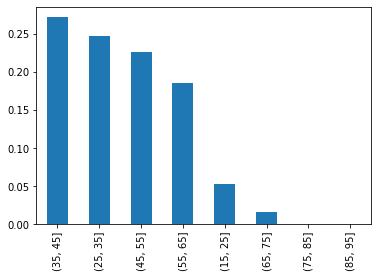

In [22]:
pd.cut(apli_data3.YEARS_BIRTH,bins=[15,25,35,45,55,65,75,85,95]).value_counts(normalize=True).plot.bar()
plt.show()

Note:Here with age group 35 to 45 are applying for loan most

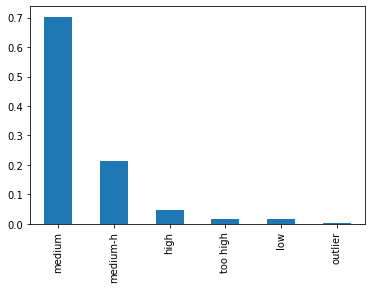

In [23]:
pd.cut(apli_data3.AMT_INCOME_TOTAL,bins=[10000,50000,200000,300000,400000,500000,600000],labels=['low','medium','medium-h','high','too high','outlier']).value_counts(normalize=True).plot.bar()
plt.show()

Notes:
Here The people with medium income range  are applying for loan the most

**Data Imbalance check on TARGET Varible**

In [24]:

apli_data3['TARGET'].value_counts(normalize=True)*100


0    91.927118
1     8.072882
Name: TARGET, dtype: float64

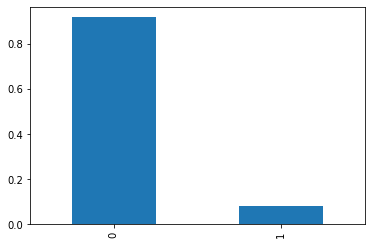

In [25]:
apli_data3['TARGET'].value_counts(normalize=True).plot.bar()
plt.show()

Notes:
1. Almost 1 out of 10 appplicants are facing the difficulties in paying the loan

In [26]:
apli_data3['CODE_GENDER'].value_counts(normalize=True)*100

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

Notes:
1. He we could see that Female Applicants are almost twice the Male Applicants

**Univariate Analysis**

In [27]:
coll=apli_data3.columns[apli_data3.dtypes=="object"].tolist()
coll

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

**Categorical column data Analysis**

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64


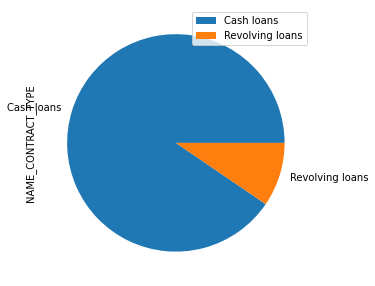

***********************************************************************************************************
F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64


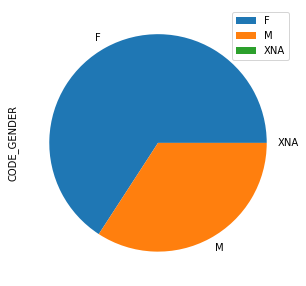

***********************************************************************************************************
N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64


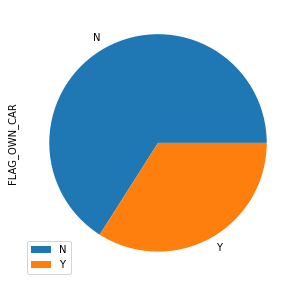

***********************************************************************************************************
Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64


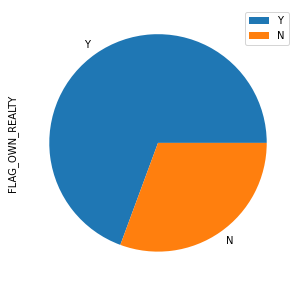

***********************************************************************************************************
Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64


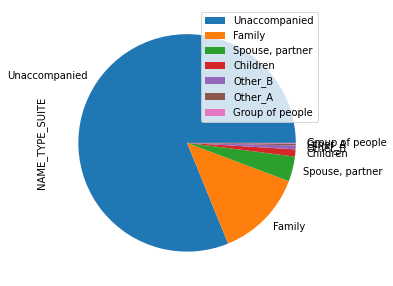

***********************************************************************************************************
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64


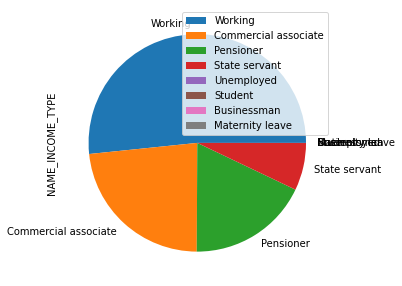

***********************************************************************************************************
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64


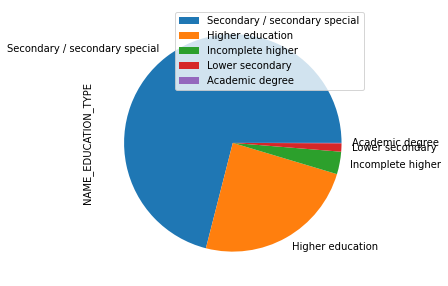

***********************************************************************************************************
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64


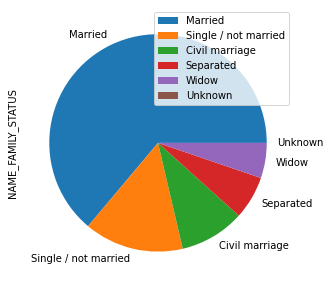

***********************************************************************************************************
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64


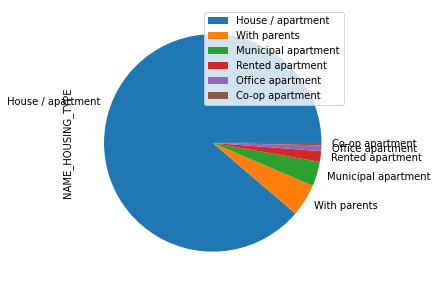

***********************************************************************************************************
Unknown                  0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64


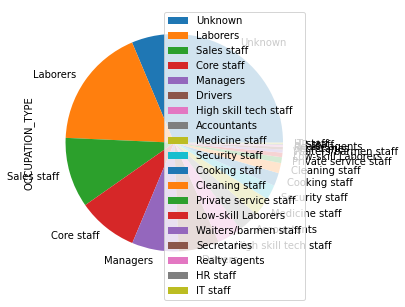

***********************************************************************************************************
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


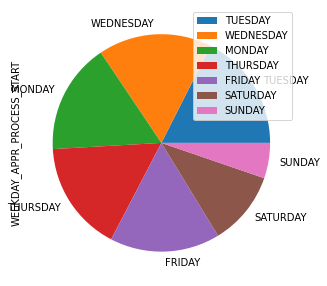

***********************************************************************************************************
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministri

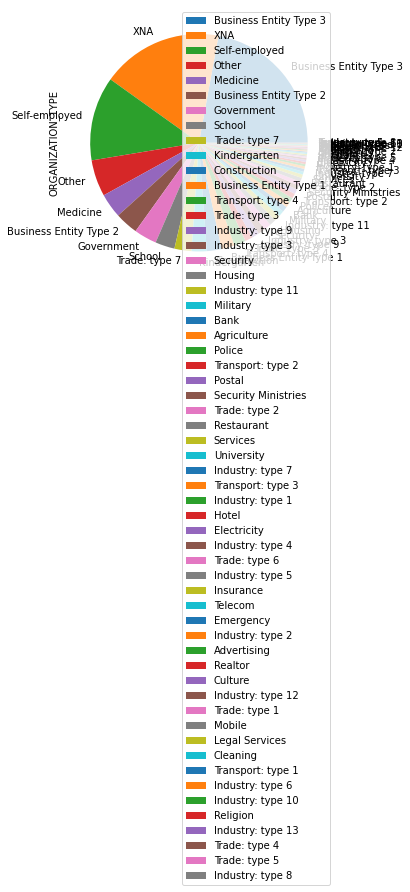

***********************************************************************************************************


In [28]:
for c in coll:
  print(apli_data3[c].value_counts(normalize=True))
  plt.figure(figsize=[5,5])
  apli_data3[c].value_counts(normalize=True).plot.pie()
  plt.legend()
  plt.show()
  print("***********************************************************************************************************")


Notes:
  NAME_CONTRACT_TYPE-->Revolving loans are less compared to Cash loans. Cash loan=90% and Rvolving loan=10%


1.     NAME_CONTRACT_TYPE:Revolving loans are less compared to Cash loans. Cash loan=90% and Rvolving loan=10%
2.     CODE_GENDER: Female have taken the loans compared to males F=64% and M=34%
3.     FLAG_OWN_CAR :34% applicants won the car
4.     FLAG_OWN_REALTY: 30% applicants has no own house and 69% applicants  has own house
5.     NAME_TYPE_SUITE: 81% of applicants came alone
6.     NAME_INCOME_TYPE:Most applicants are working
7.     NAME_EDUCATION_TYPE: 71% applicants have secondary/ secondary special education type
8.     NAME_FAMILY_STATUS: Married people are most applied for lone stand at 63%
9.     OCCUPATION_TYPE: Labours applicants are highest while IT staff are least.
10.    ORGANIZATION_TYPE: Business entity type3 organization type applicants are more compared to all other types.




In [29]:
col3=apli_data3.columns[apli_data3.dtypes=="int64"].tolist()
col4=apli_data3.columns[apli_data3.dtypes=="float64"].tolist()
print(col3+col4)


['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'YEARS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOU

**Dropping Flag columns**

In [30]:
apli_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [32]:
apli_data5=apli_data3.copy()
for c in apli_data5.columns:
  if c.startswith("FLAG"):
    apli_data5.drop(c,axis=1,inplace=True)

**Numerical columns Analysis**


count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


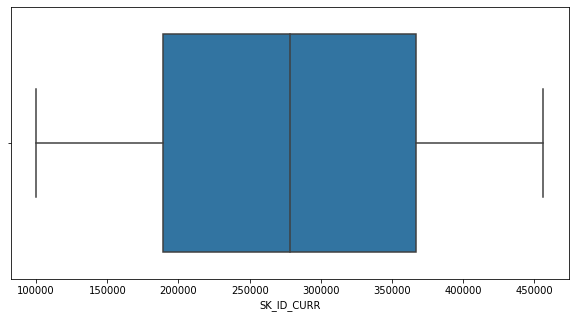

**********************************************************************************************************
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


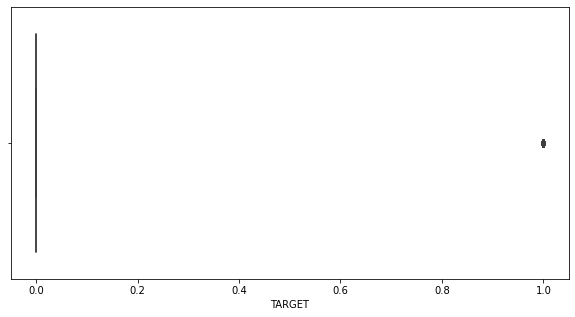

**********************************************************************************************************
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


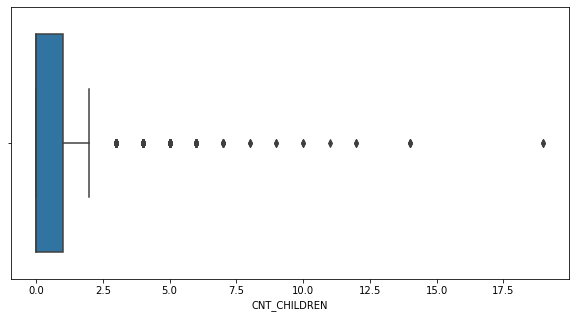

**********************************************************************************************************
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


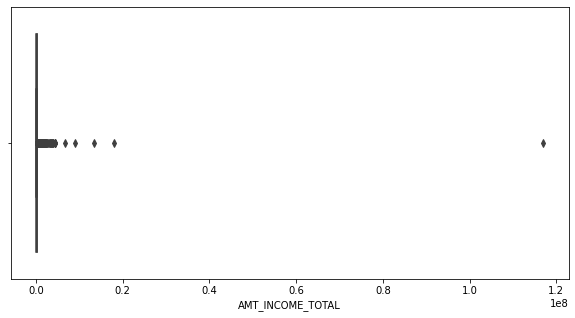

**********************************************************************************************************
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


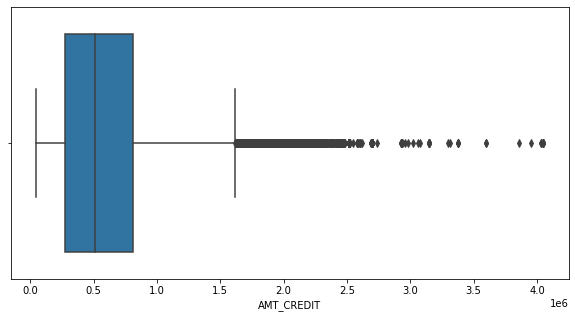

**********************************************************************************************************
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


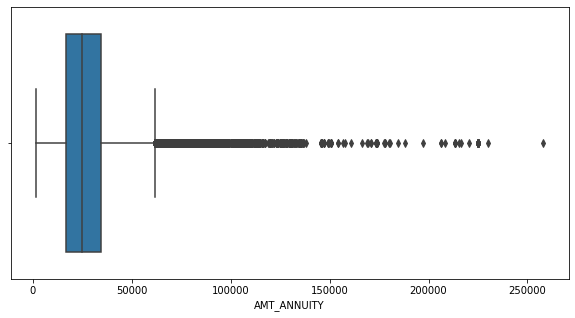

**********************************************************************************************************
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


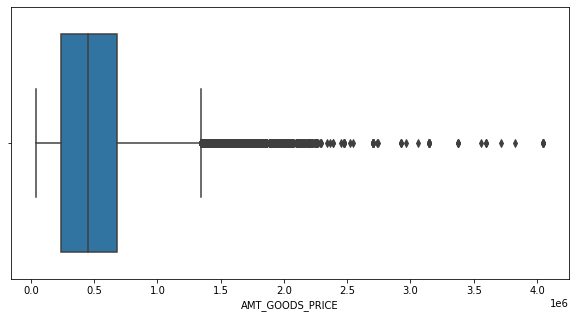

**********************************************************************************************************
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


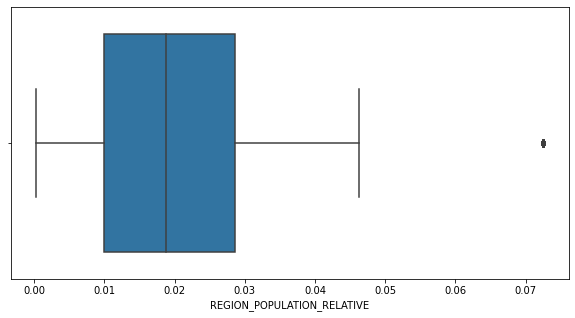

**********************************************************************************************************
count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64


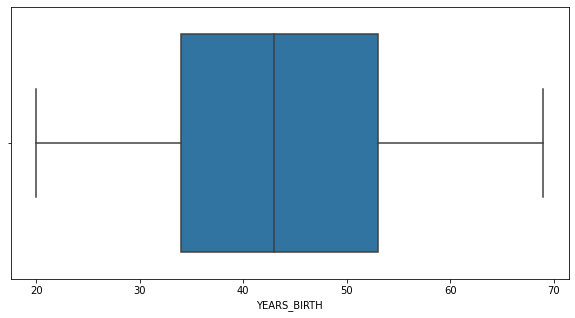

**********************************************************************************************************
count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64


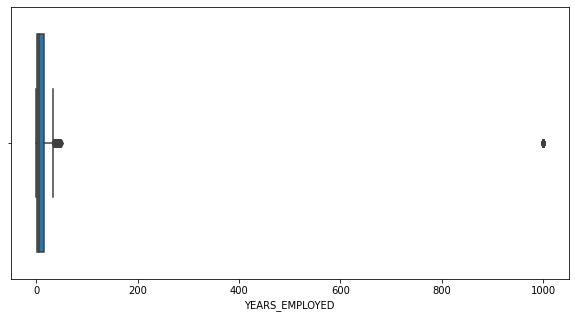

**********************************************************************************************************
count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: YEARS_REGISTRATION, dtype: float64


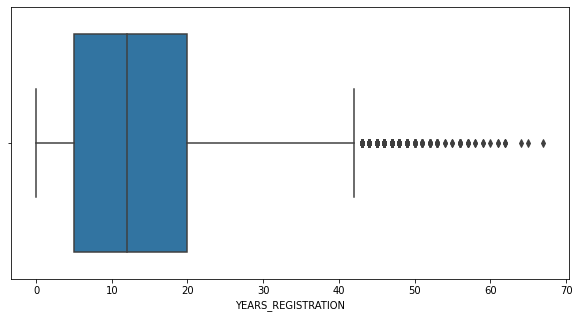

**********************************************************************************************************
count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: YEARS_ID_PUBLISH, dtype: float64


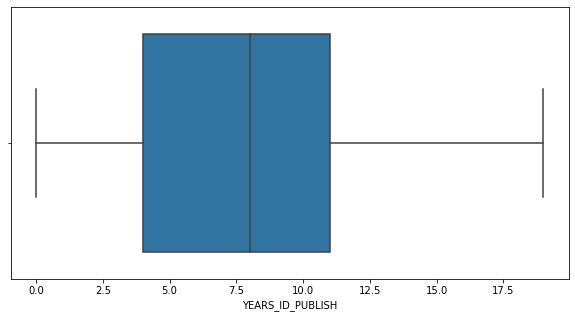

**********************************************************************************************************
count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


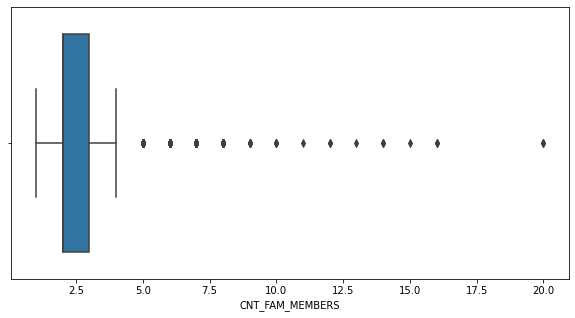

**********************************************************************************************************
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


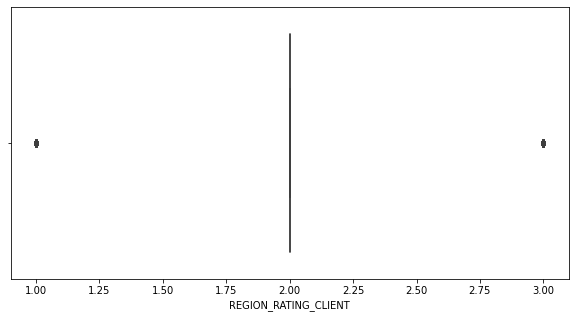

**********************************************************************************************************
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


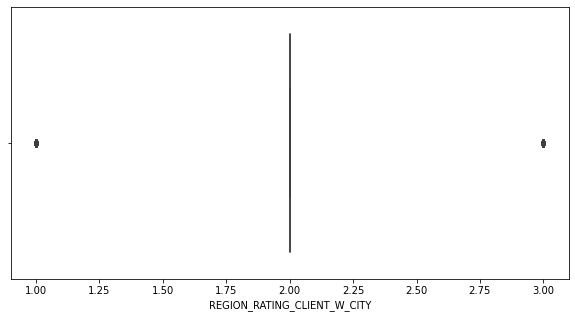

**********************************************************************************************************
count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


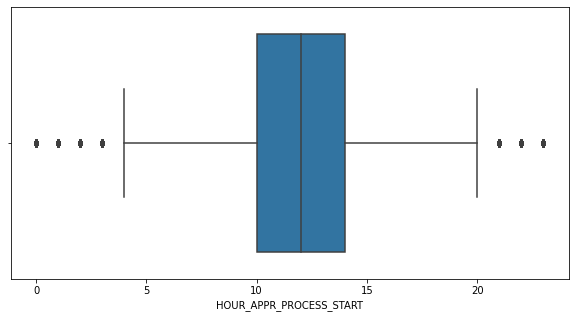

**********************************************************************************************************
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


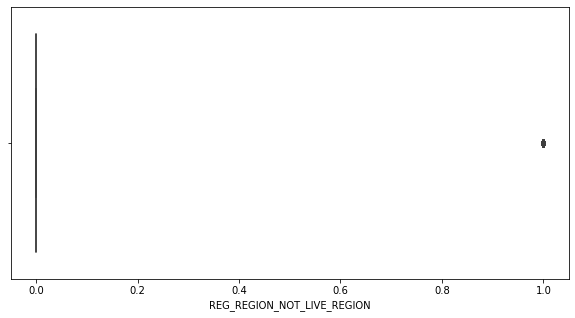

**********************************************************************************************************
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


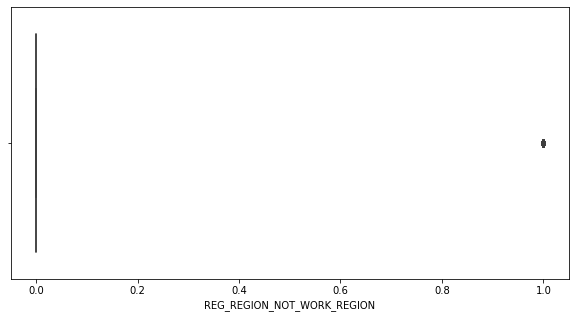

**********************************************************************************************************
count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


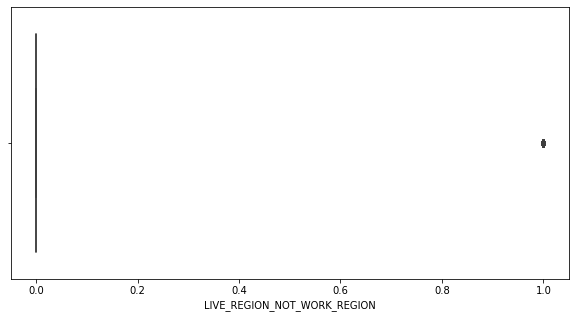

**********************************************************************************************************
count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


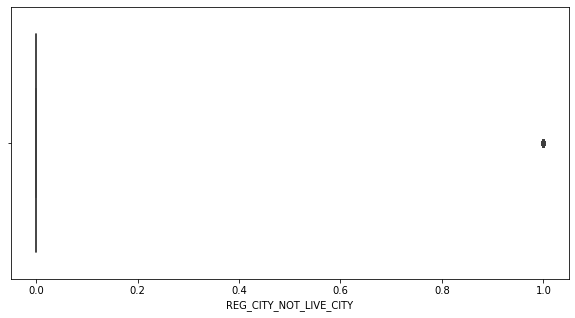

**********************************************************************************************************
count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


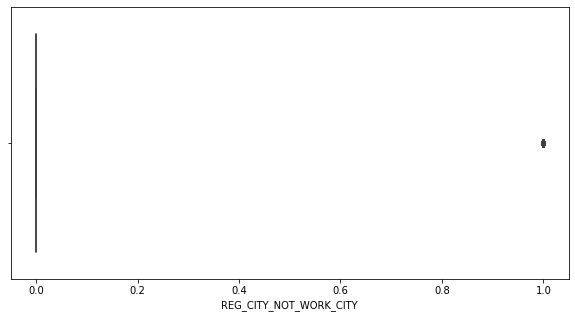

**********************************************************************************************************
count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


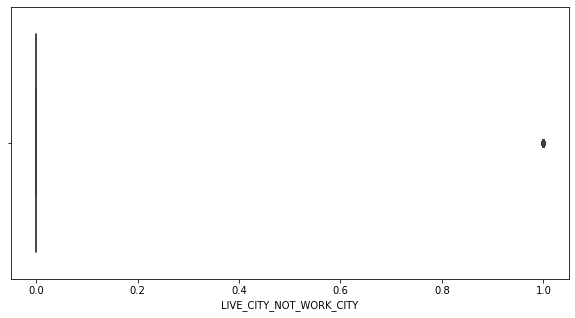

**********************************************************************************************************
count    3.075110e+05
mean     5.145034e-01
std      1.908699e-01
min      8.173617e-08
25%      3.929737e-01
50%      5.659614e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


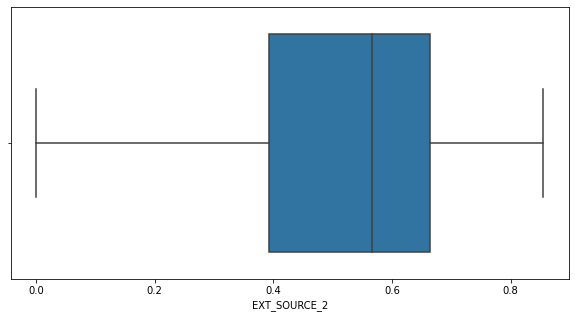

**********************************************************************************************************
count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


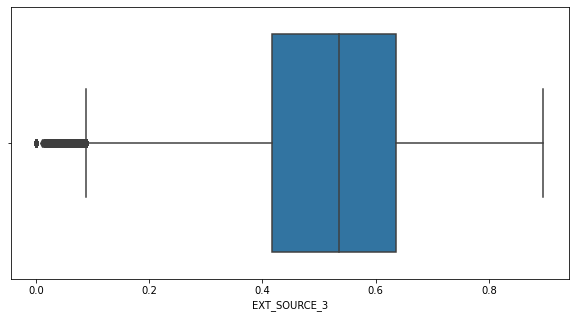

**********************************************************************************************************
count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


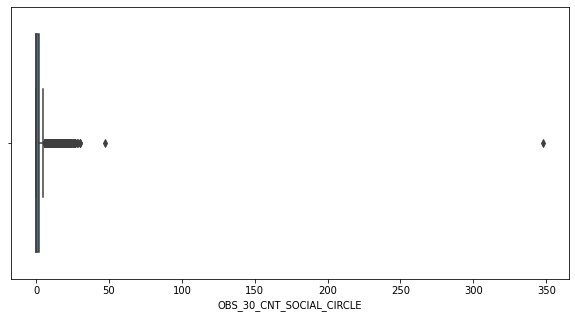

**********************************************************************************************************
count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


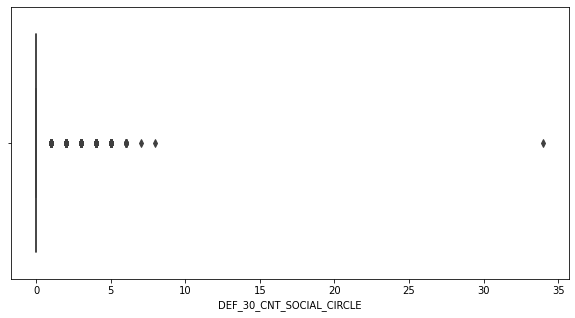

**********************************************************************************************************
count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


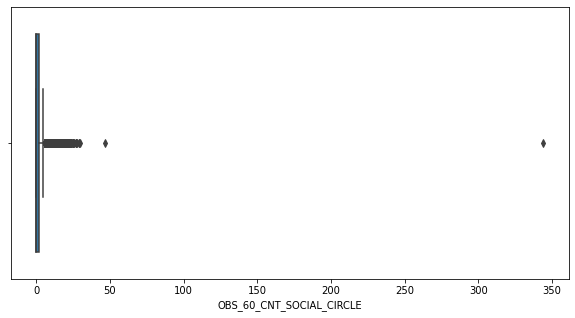

**********************************************************************************************************
count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


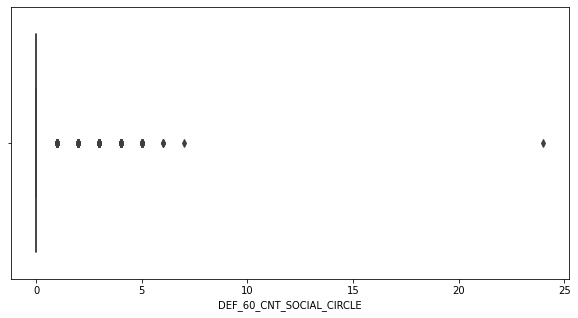

**********************************************************************************************************
count    307511.000000
mean          2.225114
std           2.193674
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


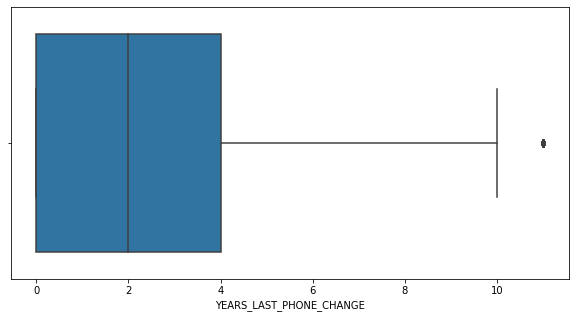

**********************************************************************************************************
count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


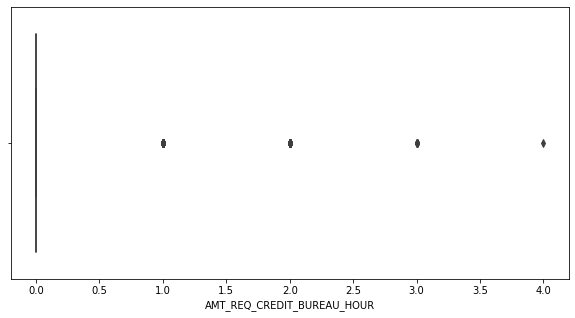

**********************************************************************************************************
count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


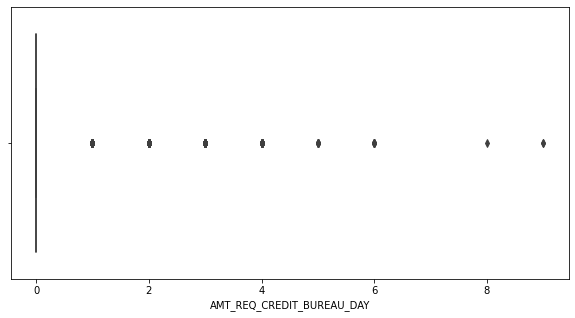

**********************************************************************************************************
count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


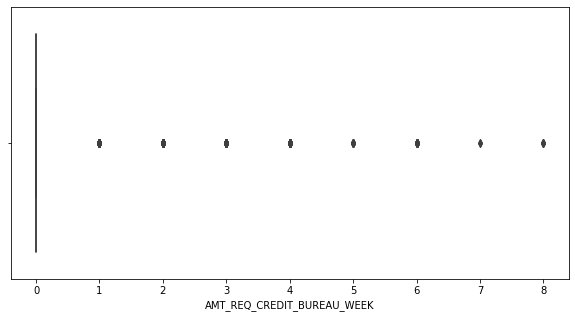

**********************************************************************************************************
count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


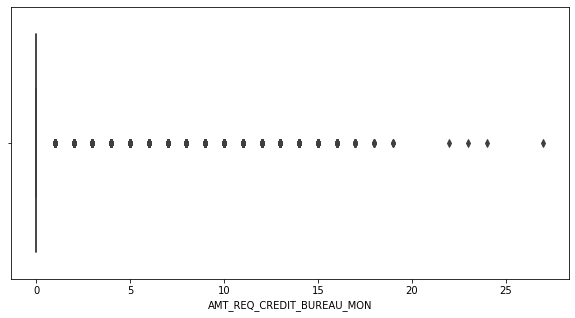

**********************************************************************************************************
count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


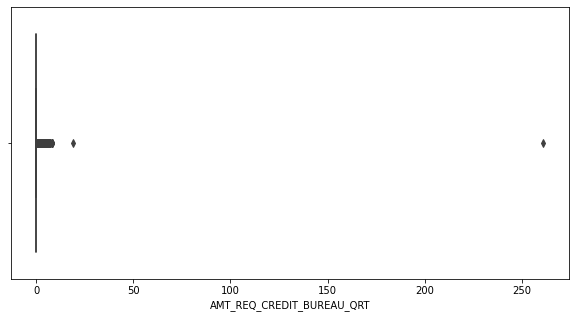

**********************************************************************************************************
count    307511.000000
mean          1.778463
std           1.765523
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


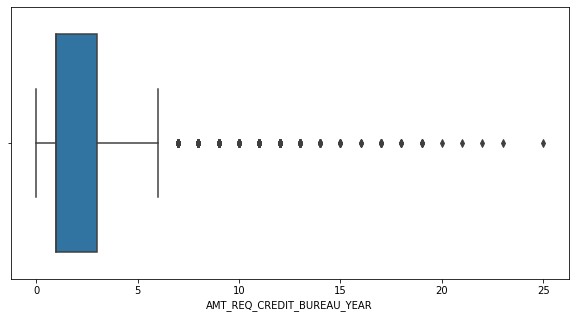

**********************************************************************************************************


In [33]:
for c in apli_data5.columns:
  if apli_data5[c].dtypes=="int64" or apli_data5[c].dtypes=="float64":
    print(apli_data5[c].describe())
    plt.figure(figsize=[10,5])
    sns.boxplot(data=apli_data5,x=c)
    plt.show()
    print("**********************************************************************************************************")

**Outliers are found in the below mentioned columns**





1. CNT_CHILDREN
2. AMT_INCOME_TOTAL
3. AMT_CREDIT
4. AMT_CREDIT
5. AMT_ANNUITY
6. AMT_GOODS_PRICE
7. YEARS_REGISTRATION
8. CNT_FAM_MEMBERS
9. AMT_REQ_CREDIT_BUREAU_YEAR

**Dividing the data frame into 2 dataframes with TARGET column based on 0 & 1**

In [34]:
apli_data5_0=apli_data5[apli_data5['TARGET']==0]
apli_data5_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,AGE_RANGE
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3.0,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,medium-h,"(35, 45]"
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,11.0,6,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,medium,"(45, 55]"
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,26.0,6,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,medium,"(45, 55]"
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,8,11.0,9,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,medium,"(45, 55]"
5,100008,0,Cash loans,M,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,46,4,13.0,1,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,medium,"(45, 55]"


In [35]:
apli_data5_1=apli_data5[apli_data5['TARGET']==1]
apli_data5_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,9.0,5,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,medium-h,"(15, 25]"
26,100031,1,Cash loans,F,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51,7,18.0,5,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,medium,"(45, 55]"
40,100047,1,Cash loans,M,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,47,3,3.0,2,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,4.0,medium-h,"(45, 55]"
42,100049,1,Cash loans,F,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,36,9,0.0,12,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,medium,"(35, 45]"
81,100096,1,Cash loans,F,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,67,1000,14.0,11,Unknown,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium,"(65, 75]"


**Univariate analysis of both above divided dataframes catagorical columns**

NAME_CONTRACT_TYPE


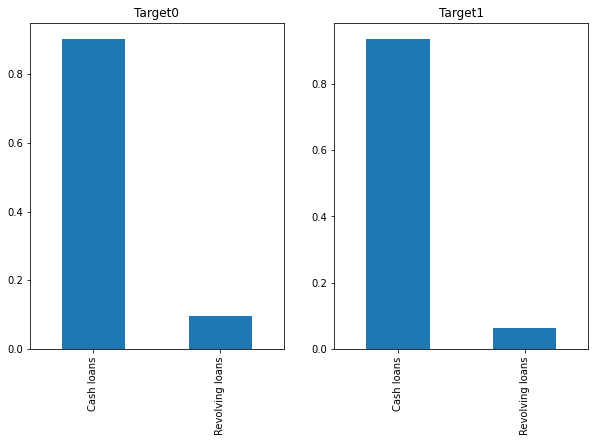

********************************************************************************************************
CODE_GENDER


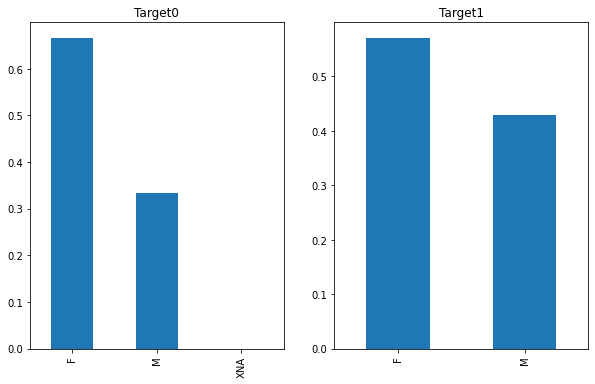

********************************************************************************************************
NAME_TYPE_SUITE


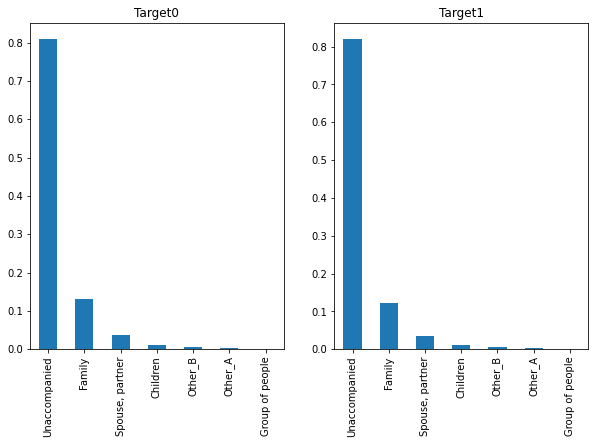

********************************************************************************************************
NAME_INCOME_TYPE


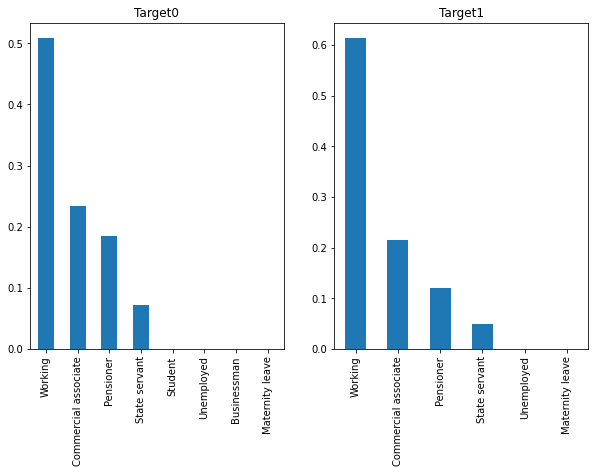

********************************************************************************************************
NAME_EDUCATION_TYPE


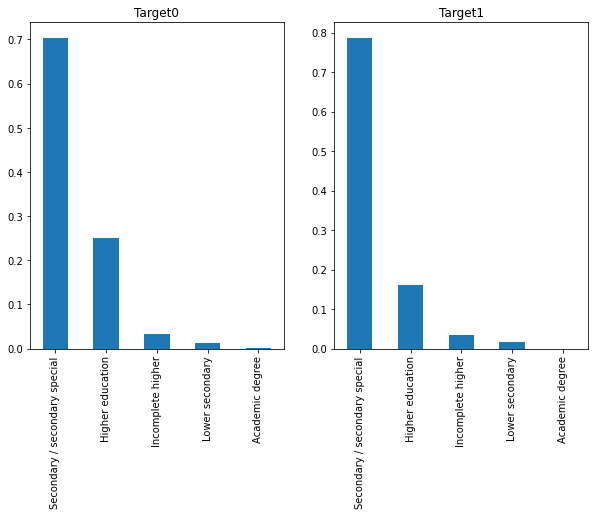

********************************************************************************************************
NAME_FAMILY_STATUS


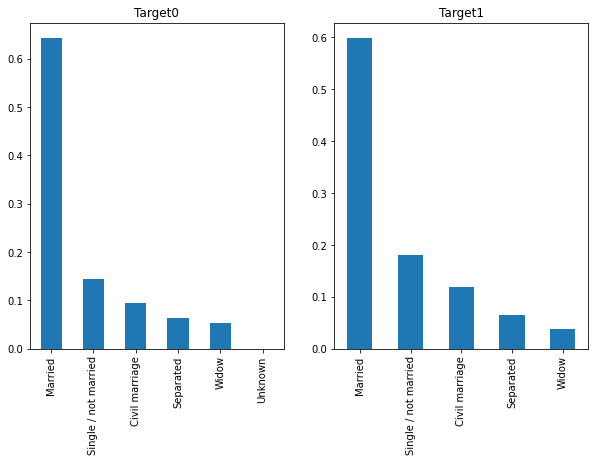

********************************************************************************************************
NAME_HOUSING_TYPE


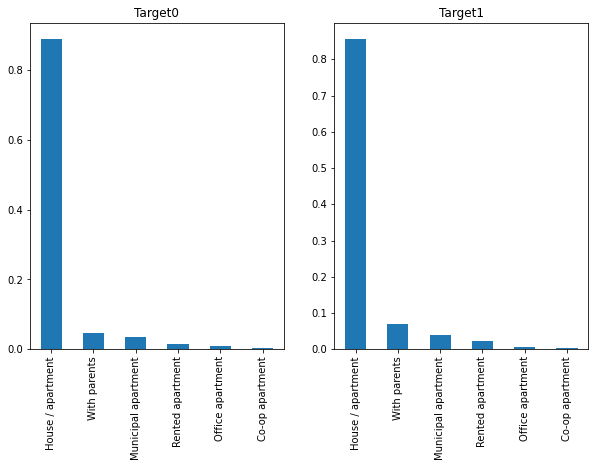

********************************************************************************************************
OCCUPATION_TYPE


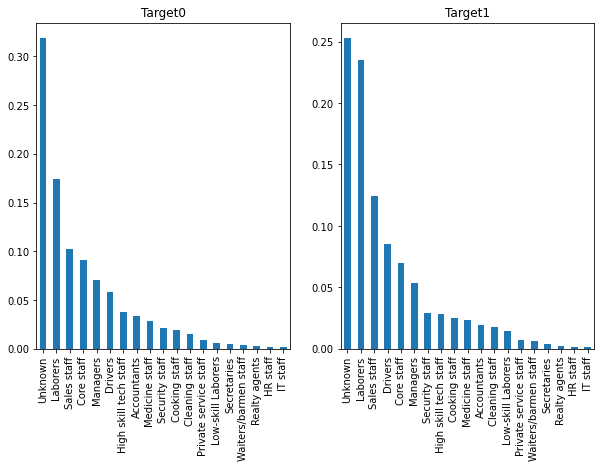

********************************************************************************************************
WEEKDAY_APPR_PROCESS_START


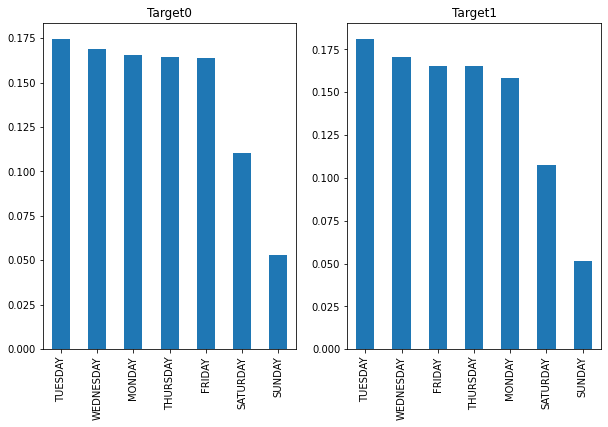

********************************************************************************************************
ORGANIZATION_TYPE


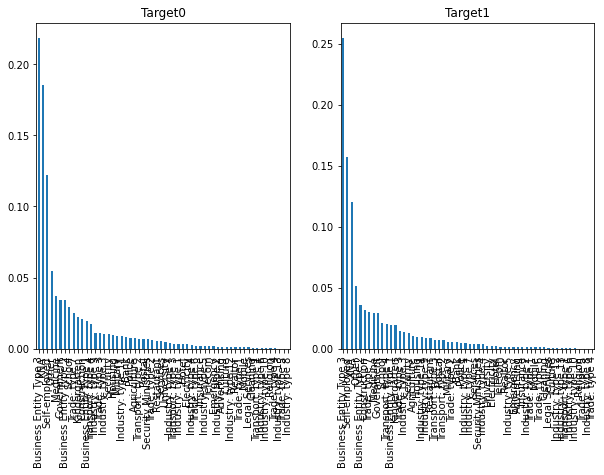

********************************************************************************************************


In [36]:
 for c in apli_data5.columns:
   if apli_data5[c].dtypes=="object":
     plt.figure(figsize=(10,6))
     plt.subplot(1,2,1)
     plt.title('Target0')
     print(c)
     apli_data5_0[c].value_counts(normalize=True).plot.bar()
     plt.subplot(1,2,2)
     plt.title('Target1')
     apli_data5_1[c].value_counts(normalize=True).plot.bar()
     plt.show()
     print("********************************************************************************************************")

Notes:

1. NAME_CONTRACT_TYPE: For Both type  Targets has more cash loas compared to revoving loans
2.  CODE_GENDER: Feamle applicants are mmore loan defaulters in target 1


**Bivariate Annalysis :**

**Analysis with respect to Range of income and Age of Applicants**

Age group


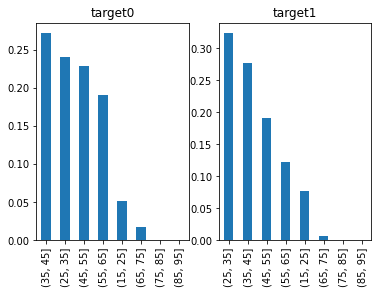

In [37]:
print('Age group')
plt.subplot(1,2,1)
plt.title('target0')
pd.cut(apli_data5_0.YEARS_BIRTH,bins=[15,25,35,45,55,65,75,85,95]).value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
plt.title('target1')
pd.cut(apli_data5_1.YEARS_BIRTH,bins=[15,25,35,45,55,65,75,85,95]).value_counts(normalize=True).plot.bar()
plt.show()

Notes:
1. Age goup 35-45 year applicants are more in target 0
2. age group 25-35 years applicants are more in target 1

In [38]:
apli_data5_0['INCOME_RANGE'].head()

1    medium-h
2      medium
3      medium
4      medium
5      medium
Name: INCOME_RANGE, dtype: category
Categories (6, object): ['low' < 'medium' < 'medium-h' < 'high' < 'too high' < 'outlier']

Income group


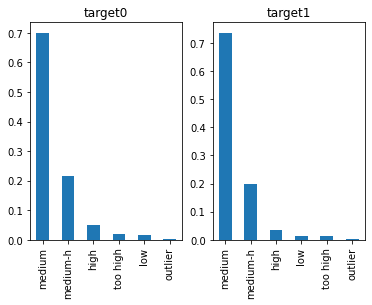

In [39]:
print('Income group')
plt.subplot(1,2,1)
plt.title('target0')
apli_data5_0['INCOME_RANGE'].value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
plt.title('target1')
apli_data5_1['INCOME_RANGE'].value_counts(normalize=True).plot.bar()
plt.show()

Notes:
1. Income range medium lakh applicants are more in both target 1 and target 0


**continuous Vs continuous**

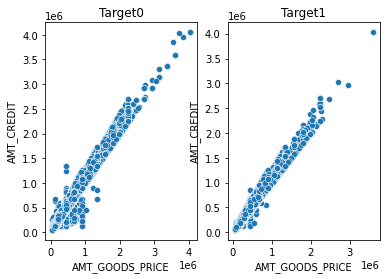

In [40]:
plt.subplot(1,2,1)
plt.title('Target0')
sns.scatterplot(x=apli_data5_0['AMT_GOODS_PRICE'],y=apli_data5_0['AMT_CREDIT'],data=apli_data5_0)
plt.subplot(1,2,2)
plt.title('Target1')
sns.scatterplot(x=apli_data5_1['AMT_GOODS_PRICE'],y=apli_data5_1['AMT_CREDIT'],data=apli_data5_1)
plt.show()

Notes:
1. As the  goods price increases CREDIT amount also increases 
2. which means the applications with higher goods price will have chances of getting higer credit amount.

**Continuous Vs Categorical**

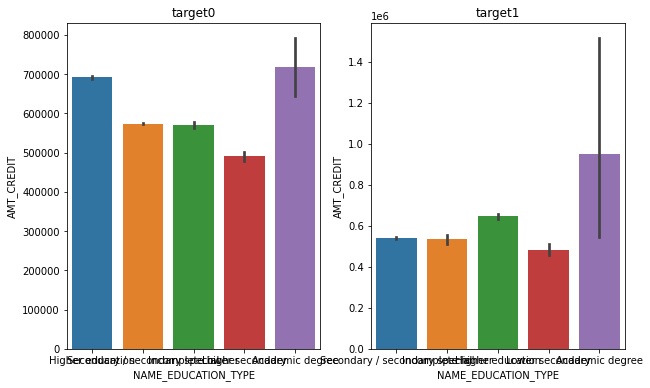

In [41]:
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
plt.title('target0')
sns.barplot(x=apli_data5_0['NAME_EDUCATION_TYPE'],y=apli_data5_0['AMT_CREDIT'],data=apli_data5_0)
plt.subplot(1,2,2)
plt.title('target1')
sns.barplot(x=apli_data5_1['NAME_EDUCATION_TYPE'],y=apli_data5_1['AMT_CREDIT'],data=apli_data5_1)
plt.show()

Notes:
1. In both Target1 and Target0 Academic degree applicants got more CREDIT amount

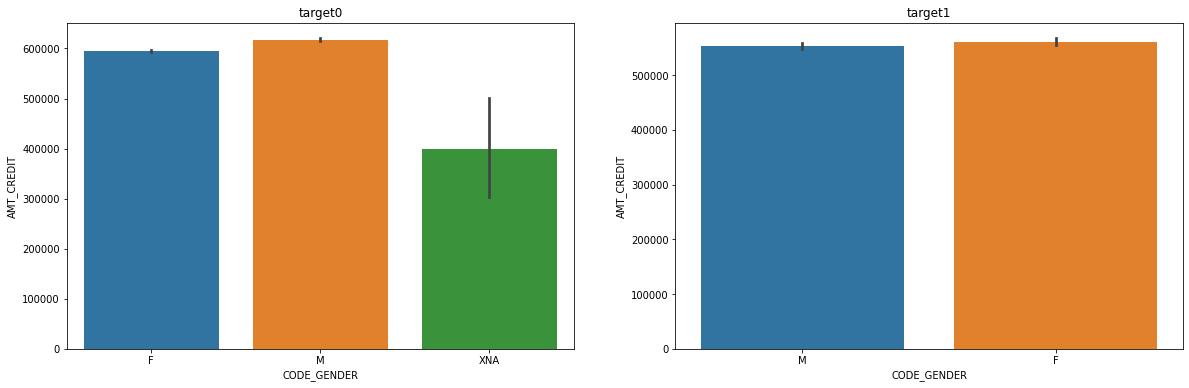

In [42]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.title('target0')
sns.barplot(x=apli_data5_0['CODE_GENDER'],y=apli_data5_0['AMT_CREDIT'],data=apli_data5_0)
plt.subplot(1,2,2)
plt.title('target1')
sns.barplot(x=apli_data5_1['CODE_GENDER'],y=apli_data5_1['AMT_CREDIT'],data=apli_data5_1)
plt.show()

Notes:
1. For target 0 Males has more CREDIT amount
2. For Target 1 Females has shightly more CREDIT amount

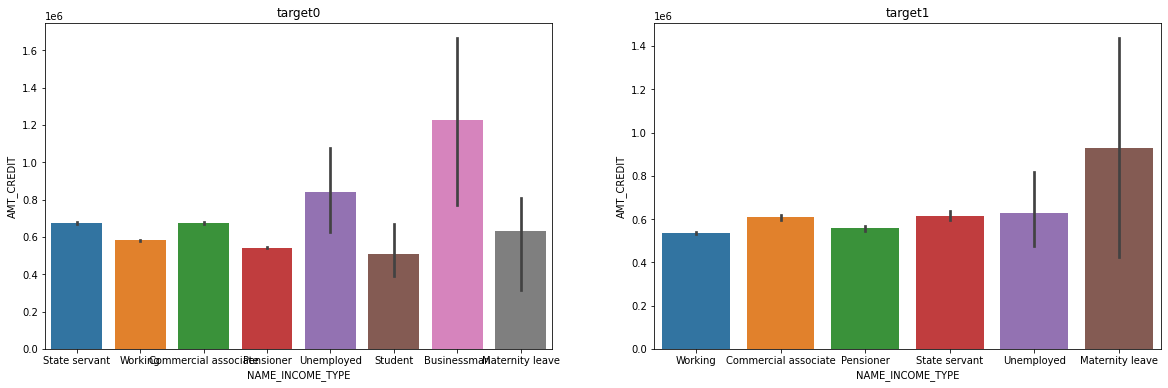

In [44]:

plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.title('target0')
sns.barplot(x=apli_data5_0['NAME_INCOME_TYPE'],y=apli_data5_0['AMT_CREDIT'],data=apli_data5_0)
plt.subplot(1,2,2)
plt.title('target1')
sns.barplot(x=apli_data5_1['NAME_INCOME_TYPE'],y=apli_data5_1['AMT_CREDIT'],data=apli_data5_1)
plt.show()

Notes:
1. Busunessmans are getting highest loan credit amount
2. for target=1 Maternanity leave are getting more loand credit amount

**Multivariate Analysis:**

In [45]:
pd.pivot_table(data=apli_data5,index='NAME_INCOME_TYPE',columns='CODE_GENDER',values='AMT_CREDIT',aggfunc="median")

CODE_GENDER,F,M,XNA
NAME_INCOME_TYPE,,,
Businessman,900000.0,1350000.0,NaN
Commercial associate,553581.0,558855.0,540000.0
Maternity leave,616500.0,765000.0,NaN
Pensioner,454500.0,486265.5,NaN
State servant,555273.0,562500.0,NaN
Student,314055.0,545040.0,NaN
Unemployed,634500.0,855000.0,NaN
Working,497448.0,497520.0,382500.0


Notes:
1. Male Busunessmans are getting more credit amount out of all catagories

In [46]:
pd.pivot_table(data=apli_data5,index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',values='AMT_INCOME_TOTAL',aggfunc="median")

CODE_GENDER,F,M,XNA
NAME_EDUCATION_TYPE,,,
Academic degree,184500.0,225000.0,NaN
Higher education,162000.0,211500.0,135000.0
Incomplete higher,135000.0,180000.0,247500.0
Lower secondary,112500.0,135000.0,NaN
Secondary / secondary special,135000.0,157500.0,182250.0


Notes:
1.  Applicants with Academic degree(male) are having more income folloed by Higher education group.

**Corelation:**

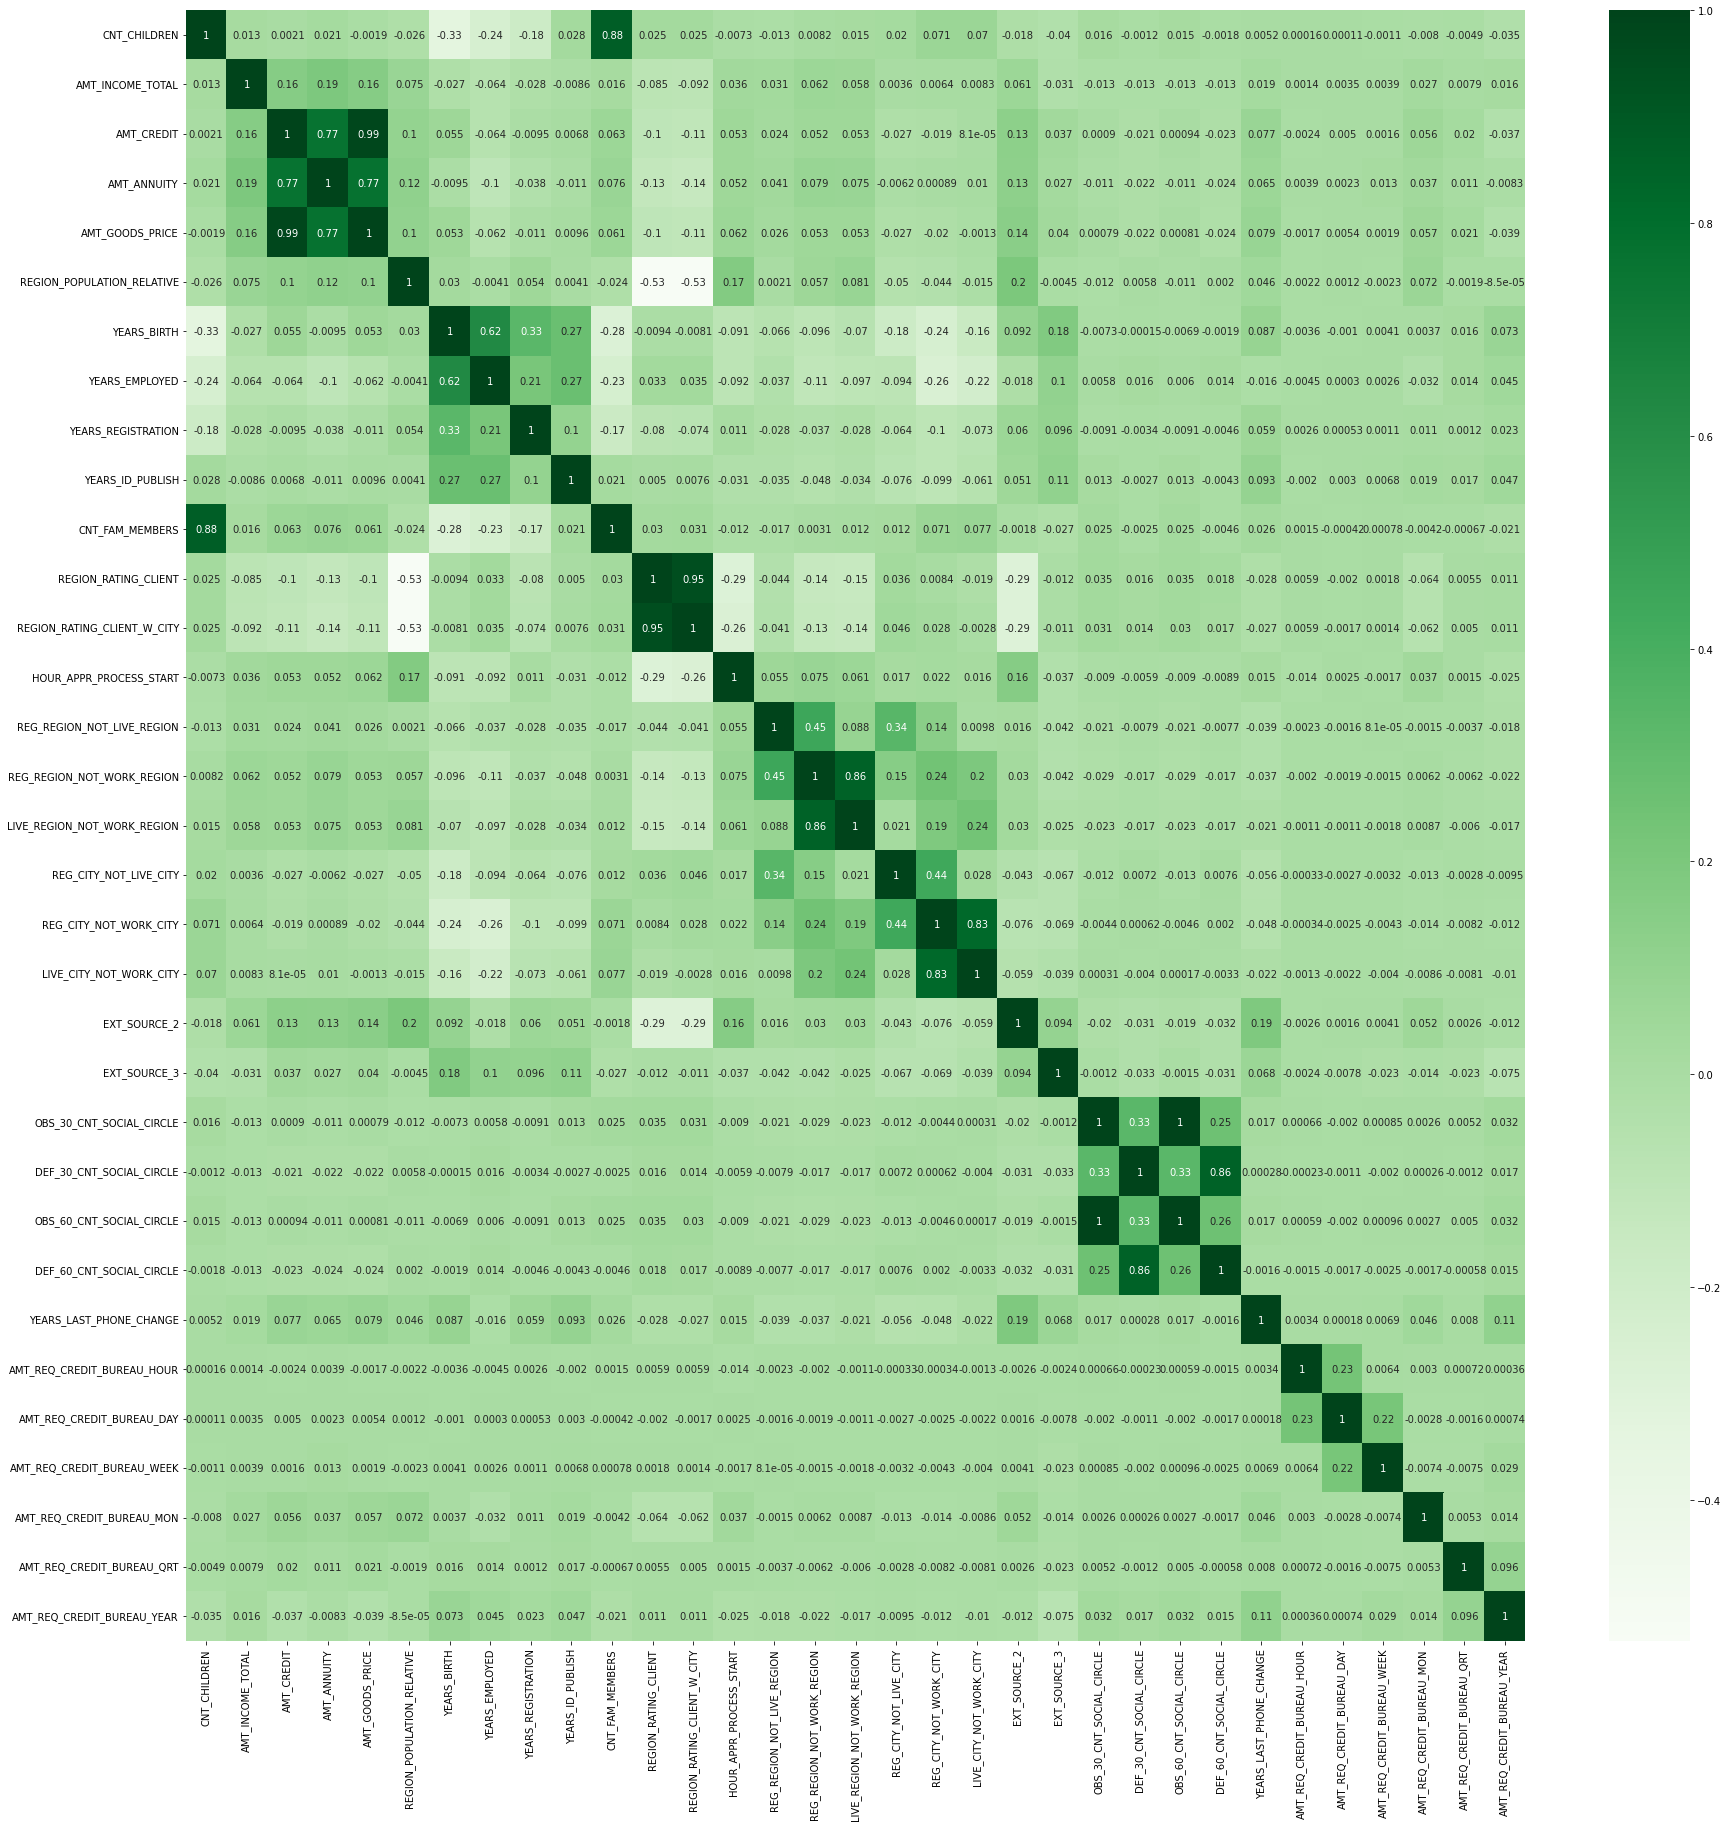

In [47]:
plt.figure(figsize=[30,30])
sns.heatmap(apli_data5.iloc[:,2:].corr(),annot=True,cmap="Greens")
plt.show()

Notes:
1. AMT_GOODS_PRICE and AMT_CREDIT strong corelation of 0.99
2. AMT_CREDIT and AMT_ANNUNITY has good corelation of 0.77
3. OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE has strong corelation of 1
4. DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE has good corelation of 0.86
5. AMT_CREDIT,AMT_ANNUNITY,AMT_GOODS_PRICE and YEARS_EMPLOYED has negative corelation

# **Exploratory Data Analysis:Previous Application DataSet**

**Import and Read the Dataset from Google Drive**

In [48]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [49]:
%cd /content/drive/MyDrive/Mydoc/

/content/drive/MyDrive/Mydoc


In [50]:
appli_data=pd.read_csv('previous_application.csv')
appli_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


**Data Inspection**

In [51]:
appli_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [52]:
appli_data.shape

(1670214, 37)

In [53]:
appli_data.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [54]:
appli_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


**DATA CLEANING : Missing Value Check and Imputation**

**Finding the missing values**

In [55]:
appli_data.isnull().sum()*100/appli_data.shape[0]

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

**Dropping the columns with missing value % >45**

In [56]:
perc = 45.0
min_count =  int(((100-perc)/100)*appli_data.shape[0] + 1)
appli_data3 = appli_data.dropna( axis=1, thresh=min_count)
appli_data3.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Notes:
1. Dropped the columns with missing value more than >45%
2. Almost 5 columns has dropped

In [57]:
appli_data3.shape

(1670214, 32)

In [58]:
col=appli_data3.columns[appli_data3.isna().any()].tolist()
col

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

**Converting -ve values to +ve values**

In [59]:
for c in appli_data3.columns:
  if appli_data3[c].dtypes=='int64' or appli_data3[c].dtypes=='float64':
    appli_data3[c]=appli_data3[c].apply(abs)
    


Notes:

1. with the help of abs() function we have converted all negative values to positive values

**Imputation of both Catagorical and Numerical columns**

In [60]:
for c in appli_data3.columns:
    if appli_data3[c].dtype== np.float64 or appli_data3[c].dtype==np.int64:
        appli_data3[c].fillna(appli_data3[c].median(),inplace=True)
    else:
        appli_data3[c].fillna(appli_data3[c].mode(),inplace=True)
     

Notes:

1. Filled all the null values of numerical columns with median
2. Filled all the null values of catagorical columns with mode

In [61]:
appli_data3.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,1,XNA,24.0,high,Cash Street: high,365243.0,921.0,741.0,1155.0,1171.0,0.0


**Binning**

In [62]:
appli_data3['AMT_APPLICATION_RANGE']=pd.qcut(appli_data3['AMT_APPLICATION'],q=[0,0.3,0.5,0.7,0.9,1],labels=['vlow','low','medium','high','vhigh'])


Notes:

1. Added 1 extra columns to the dataset i.e AMT_APPLICATION_RANGE

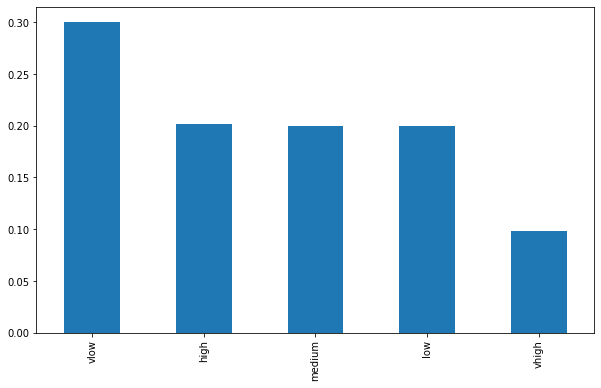

In [63]:
plt.figure(figsize=[10,6])
appli_data3['AMT_APPLICATION_RANGE'].value_counts(normalize=True).plot.bar()
plt.show()

Notes:
1. More Applicants having  verylow AMT_APPLICATION amount range

**Data Imbalance check on NAME_CONTRACT_STATUS Varible**

In [64]:
appli_data3['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

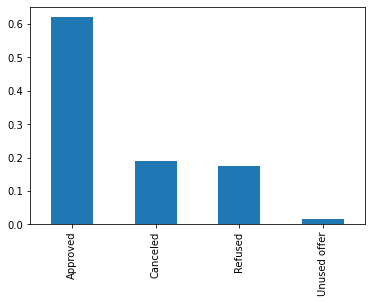

In [65]:
appli_data3['NAME_CONTRACT_STATUS'].value_counts(normalize=True).plot.bar()
plt.show()

Notes:
1. 2 out of 10 applications are cancelled 
2. Also 2 out of 10 applications are  Refused

**Univariate Analysis**
**Catagorical**

Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64


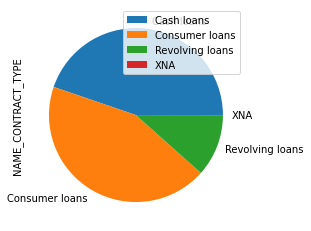

********************************************************************************************************************************************
TUESDAY      0.152746
WEDNESDAY    0.152681
MONDAY       0.151811
FRIDAY       0.150908
THURSDAY     0.149142
SATURDAY     0.144072
SUNDAY       0.098641
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


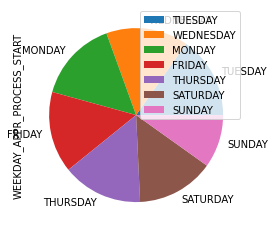

********************************************************************************************************************************************
Y    0.994926
N    0.005074
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64


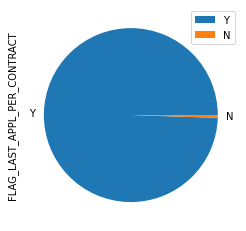

********************************************************************************************************************************************
XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Busi

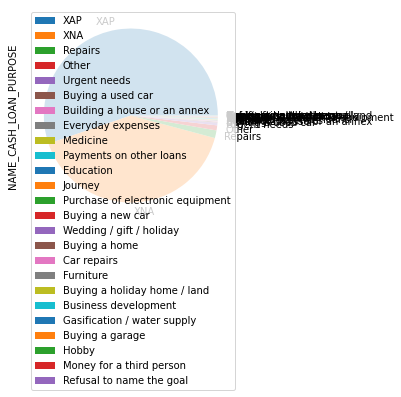

********************************************************************************************************************************************
Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64


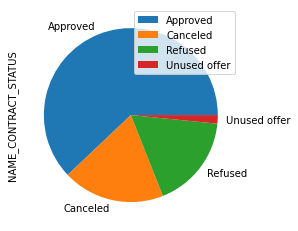

********************************************************************************************************************************************
Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: NAME_PAYMENT_TYPE, dtype: float64


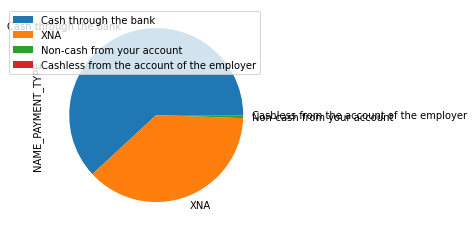

********************************************************************************************************************************************
XAP       0.810132
HC        0.104915
LIMIT     0.033337
SCO       0.022432
CLIENT    0.015828
SCOFR     0.007670
XNA       0.003140
VERIF     0.002116
SYSTEM    0.000429
Name: CODE_REJECT_REASON, dtype: float64


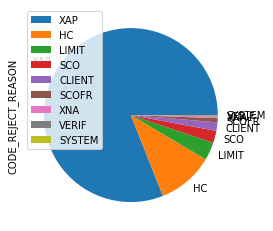

********************************************************************************************************************************************
Repeater     0.737188
New          0.180434
Refreshed    0.081217
XNA          0.001162
Name: NAME_CLIENT_TYPE, dtype: float64


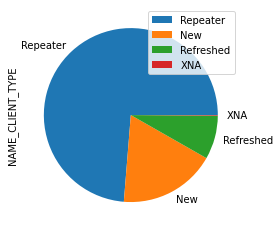

********************************************************************************************************************************************
XNA                         5.692738e-01
Mobile                      1.345384e-01
Consumer Electronics        7.279067e-02
Computers                   6.332662e-02
Audio/Video                 5.953788e-02
Furniture                   3.212522e-02
Photo / Cinema Equipment    1.498072e-02
Construction Materials      1.496515e-02
Clothing and Accessories    1.410238e-02
Auto Accessories            4.419194e-03
Jewelry                     3.765984e-03
Homewares                   3.007399e-03
Medical Supplies            2.300903e-03
Vehicles                    2.017706e-03
Sport and Leisure           1.784801e-03
Gardening                   1.597400e-03
Other                       1.529145e-03
Office Appliances           1.396827e-03
Tourism                     9.932859e-04
Medicine                    9.280248e-04
Direct Sales                2.670316e-0

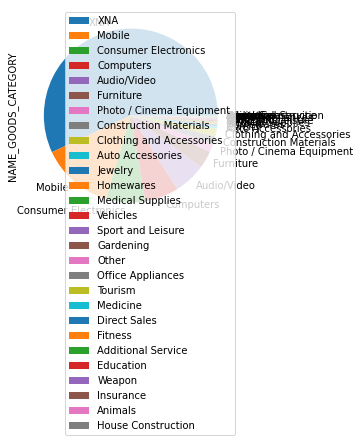

********************************************************************************************************************************************
POS      0.413726
Cash     0.276350
XNA      0.222864
Cards    0.086806
Cars     0.000254
Name: NAME_PORTFOLIO, dtype: float64


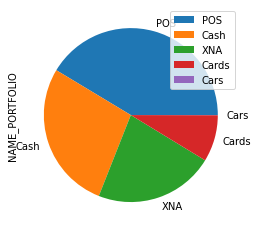

********************************************************************************************************************************************
XNA        0.636844
x-sell     0.273191
walk-in    0.089965
Name: NAME_PRODUCT_TYPE, dtype: float64


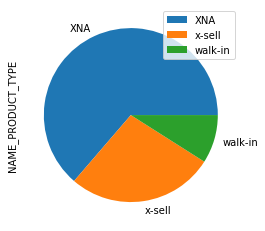

********************************************************************************************************************************************
Credit and cash offices       0.431063
Country-wide                  0.296184
Stone                         0.126980
Regional / Local              0.064978
Contact center                0.042687
AP+ (Cash loan)               0.034155
Channel of corporate sales    0.003682
Car dealer                    0.000271
Name: CHANNEL_TYPE, dtype: float64


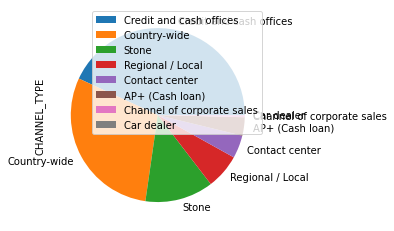

********************************************************************************************************************************************
XNA                     0.512342
Consumer electronics    0.238451
Connectivity            0.165266
Furniture               0.034636
Construction            0.017831
Clothing                0.014339
Industry                0.011492
Auto technology         0.002988
Jewelry                 0.001622
MLM partners            0.000727
Tourism                 0.000307
Name: NAME_SELLER_INDUSTRY, dtype: float64


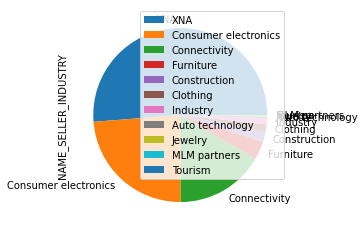

********************************************************************************************************************************************
XNA           0.309670
middle        0.230828
high          0.211548
low_normal    0.192847
low_action    0.055107
Name: NAME_YIELD_GROUP, dtype: float64


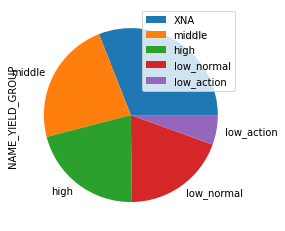

********************************************************************************************************************************************
Cash                              0.171265
POS household with interest       0.157870
POS mobile with interest          0.132148
Cash X-Sell: middle               0.086164
Cash X-Sell: low                  0.077999
Card Street                       0.067420
POS industry with interest        0.059186
POS household without interest    0.049649
Card X-Sell                       0.048257
Cash Street: high                 0.035715
Cash X-Sell: high                 0.035512
Cash Street: middle               0.020755
Cash Street: low                  0.020261
POS mobile without interest       0.014421
POS other with interest           0.014300
POS industry without interest     0.007547
POS others without interest       0.001530
Name: PRODUCT_COMBINATION, dtype: float64


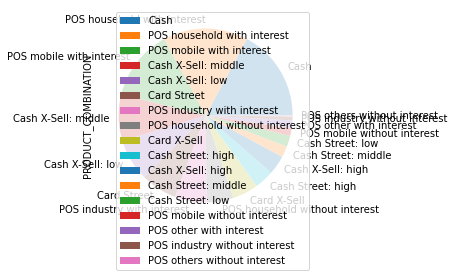

********************************************************************************************************************************************


In [66]:
for c in appli_data3.columns:
  if appli_data3[c].dtypes=='object':
    print(appli_data3[c].value_counts(normalize=True))
    appli_data3[c].value_counts(normalize=True).plot.pie()
    plt.legend()
    plt.show()
    print("********************************************************************************************************************************************")

Notes:(not all the above plots has usefull insights)
1. NAME_CONTRACT_TYPE: Cash loans are more compared to all other loans types
2. NAME_CASH_LOAN_PURPOSE: XAP is the most requested purpose of cash loan
3. NAME_CONTRACT_STATUS : Almost 4 applications are either  getting cancelled or rejected!
4. CODE_REJECT_REASON :Most of applications are getting rejected due XAP purpose
5. NAME_CLIENT_TYPE: Only 18% applications are new
6. NAME_PORTFOLIO: POS purpose applicats are more amd Car purpose applicants are less

**Numerical columns Analysis**

count    1.670214e+06
mean     1.923089e+06
std      5.325980e+05
min      1.000001e+06
25%      1.461857e+06
50%      1.923110e+06
75%      2.384280e+06
max      2.845382e+06
Name: SK_ID_PREV, dtype: float64


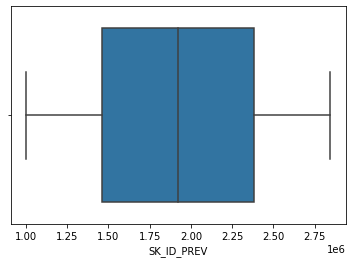

count    1.670214e+06
mean     2.783572e+05
std      1.028148e+05
min      1.000010e+05
25%      1.893290e+05
50%      2.787145e+05
75%      3.675140e+05
max      4.562550e+05
Name: SK_ID_CURR, dtype: float64


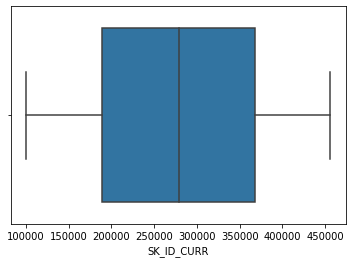

count    1.670214e+06
mean     1.490651e+04
std      1.317751e+04
min      0.000000e+00
25%      7.547096e+03
50%      1.125000e+04
75%      1.682403e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


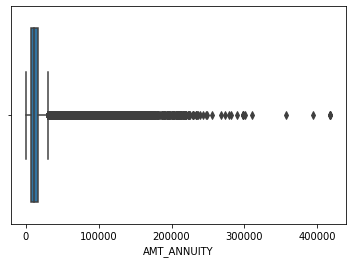

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


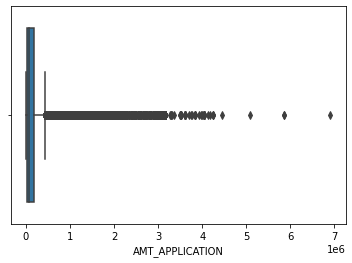

count    1.670214e+06
mean     1.961140e+05
std      3.185745e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64


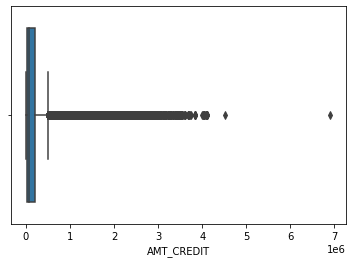

count    1.670214e+06
mean     2.011815e+05
std      2.808629e+05
min      0.000000e+00
25%      6.750000e+04
50%      1.123200e+05
75%      1.804050e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


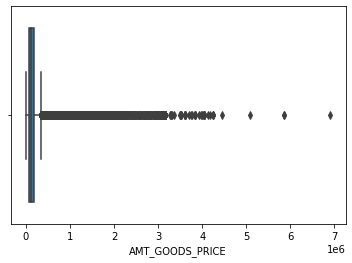

count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


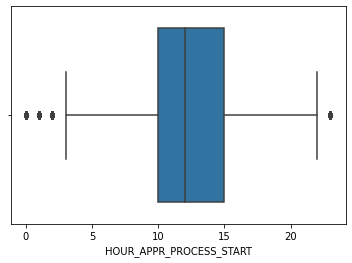

count    1.670214e+06
mean     9.964675e-01
std      5.932963e-02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64


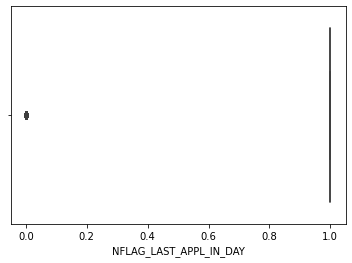

count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64


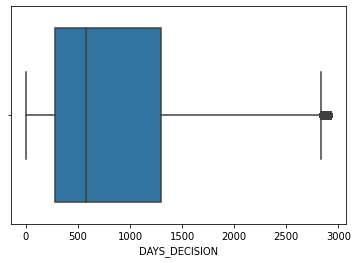

count    1.670214e+06
mean     3.148644e+02
std      7.127403e+03
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64


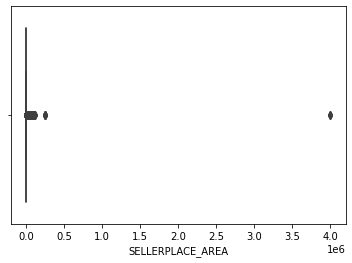

count    1.670214e+06
mean     1.515057e+01
std      1.295220e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.600000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


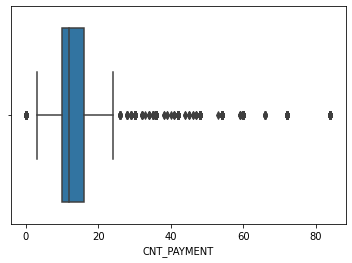

count    1.670214e+06
mean     3.515695e+05
std      6.923193e+04
min      2.000000e+00
25%      3.652430e+05
50%      3.652430e+05
75%      3.652430e+05
max      3.652430e+05
Name: DAYS_FIRST_DRAWING, dtype: float64


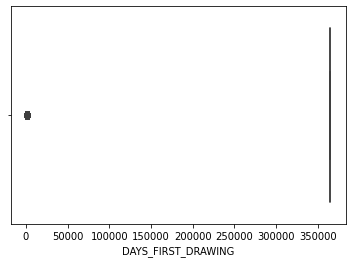

count    1.670214e+06
mean     9.893131e+03
std      5.612401e+04
min      2.000000e+00
25%      7.520000e+02
50%      9.210000e+02
75%      1.132000e+03
max      3.652430e+05
Name: DAYS_FIRST_DUE, dtype: float64


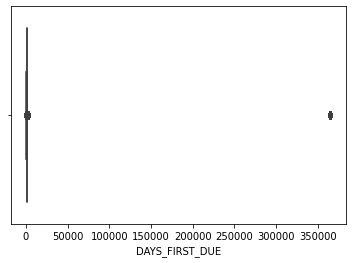

count    1.670214e+06
mean     2.129179e+04
std      8.393241e+04
min      0.000000e+00
25%      5.360000e+02
50%      7.410000e+02
75%      9.960000e+02
max      3.652430e+05
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64


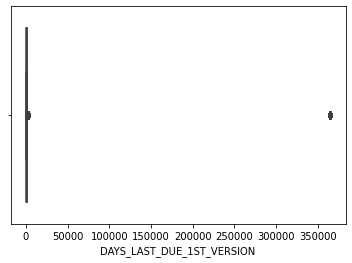

count    1.670214e+06
mean     4.712409e+04
std      1.210419e+05
min      2.000000e+00
25%      8.730000e+02
50%      1.155000e+03
75%      1.518000e+03
max      3.652430e+05
Name: DAYS_LAST_DUE, dtype: float64


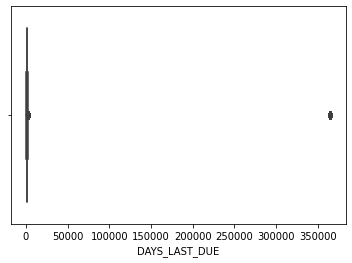

count    1.670214e+06
mean     5.032640e+04
std      1.245493e+05
min      2.000000e+00
25%      8.760000e+02
50%      1.171000e+03
75%      1.544000e+03
max      3.652430e+05
Name: DAYS_TERMINATION, dtype: float64


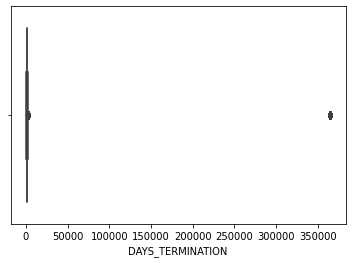

count    1.670214e+06
mean     1.985506e-01
std      3.989090e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64


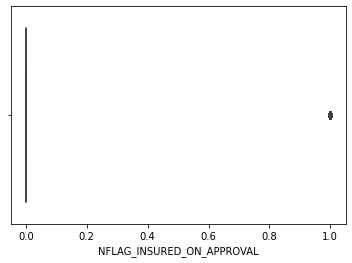

In [67]:
for c in appli_data3.columns:
  if appli_data3[c].dtypes=='int64' or appli_data3[c].dtypes=='float64':
    print(appli_data3[c].describe())
    sns.boxplot(data=appli_data3,x=c)
    plt.show()

Notes:(Note all the above plots are use full)
1. AMT_ANNUITY, AMT_APPLICATTION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT has outliers

**Outliers:**

1. AMT_ANNUITY, AMT_APPLICATTION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT
(these are the columns where outliers are observed)

**Dividing the data frame into 3 dataframes with NAME_CONTRACT_STATUS column** 

In [68]:
appli_data3_a=appli_data3[appli_data3['NAME_CONTRACT_STATUS']=='Approved']
appli_data3_rr=appli_data3[appli_data3['NAME_CONTRACT_STATUS']=='Refused']
appli_data3_c=appli_data3[appli_data3['NAME_CONTRACT_STATUS']=='Canceled']

**Univariate analysis on the above divided dataframes catagorical columns**

NAME_CONTRACT_TYPE


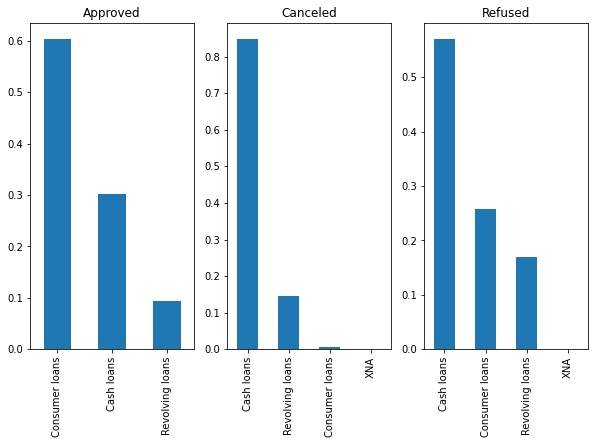

****************************************************************************************************************************************
WEEKDAY_APPR_PROCESS_START


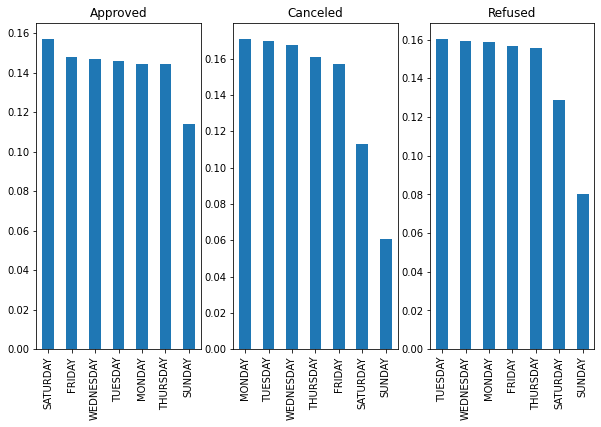

****************************************************************************************************************************************
FLAG_LAST_APPL_PER_CONTRACT


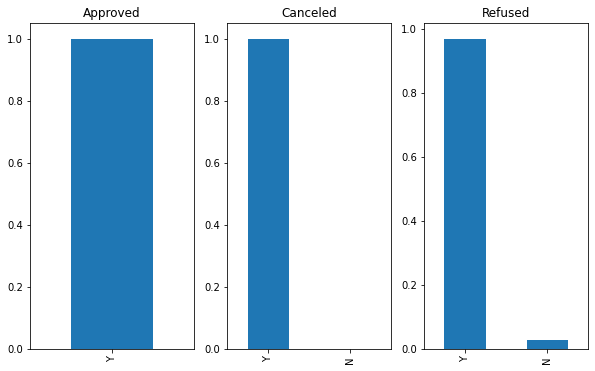

****************************************************************************************************************************************
NAME_CASH_LOAN_PURPOSE


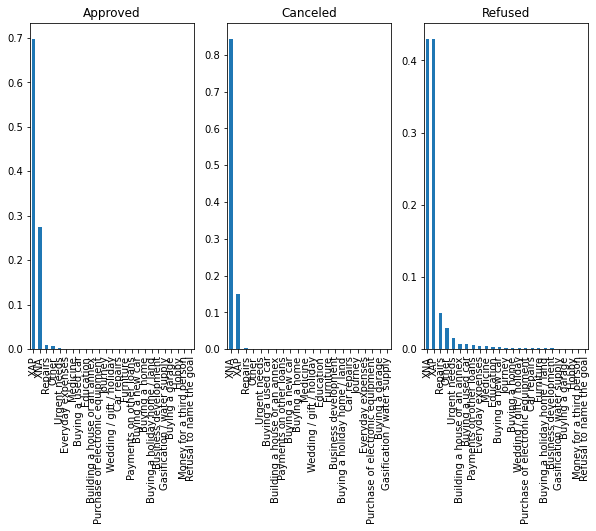

****************************************************************************************************************************************
NAME_CONTRACT_STATUS


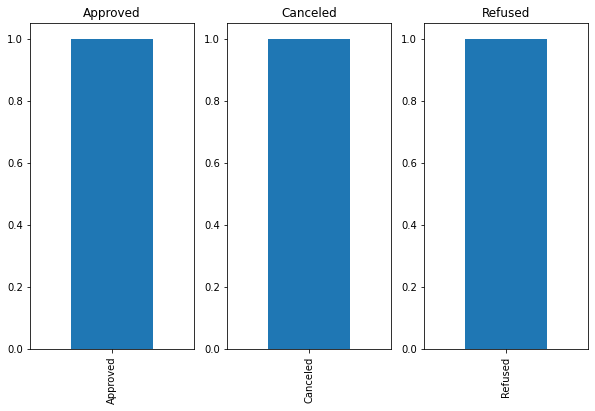

****************************************************************************************************************************************
NAME_PAYMENT_TYPE


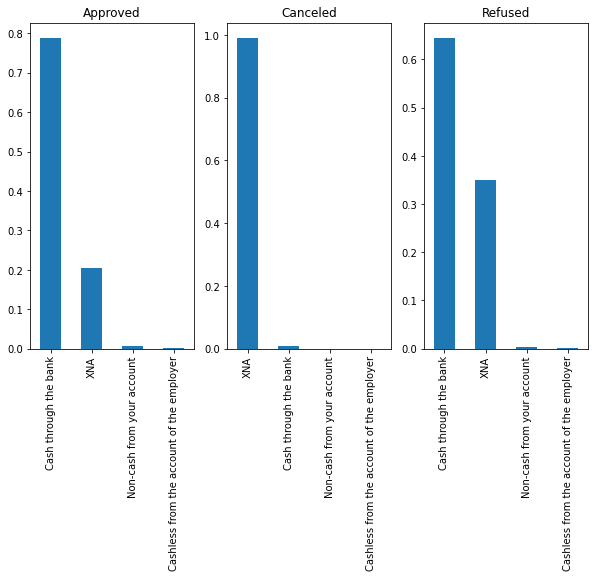

****************************************************************************************************************************************
CODE_REJECT_REASON


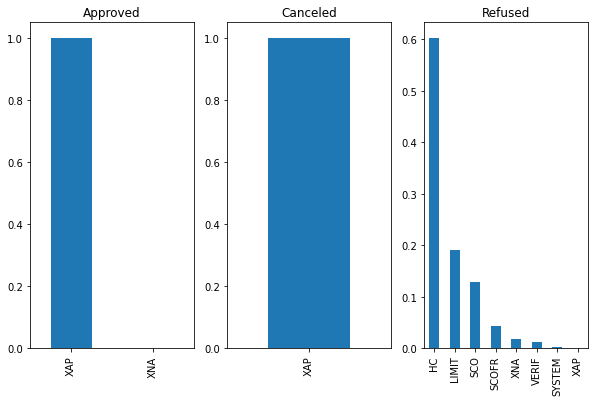

****************************************************************************************************************************************
NAME_CLIENT_TYPE


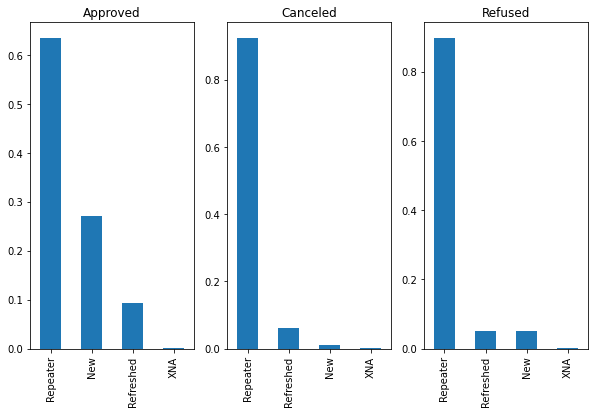

****************************************************************************************************************************************
NAME_GOODS_CATEGORY


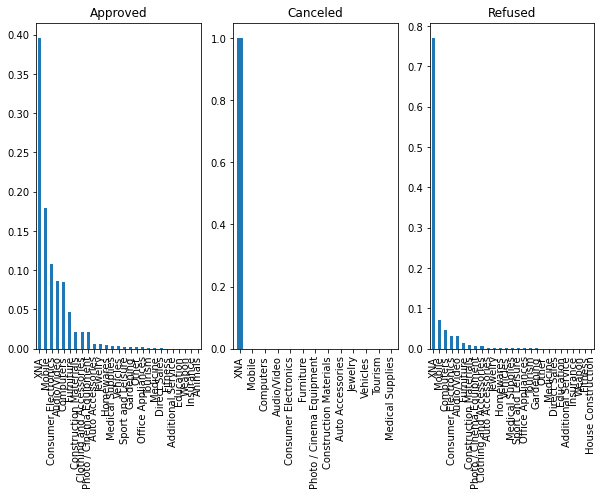

****************************************************************************************************************************************
NAME_PORTFOLIO


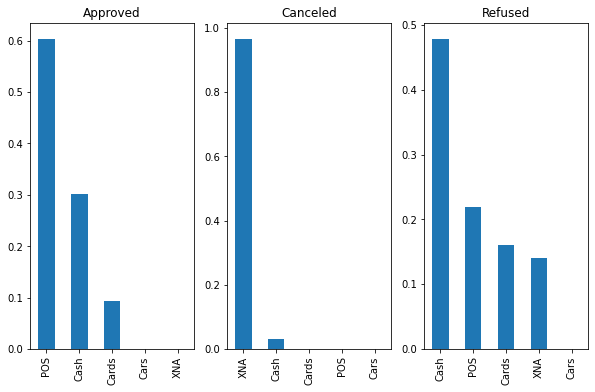

****************************************************************************************************************************************
NAME_PRODUCT_TYPE


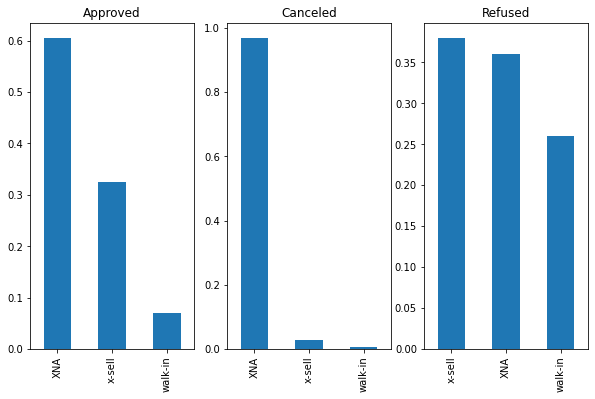

****************************************************************************************************************************************
CHANNEL_TYPE


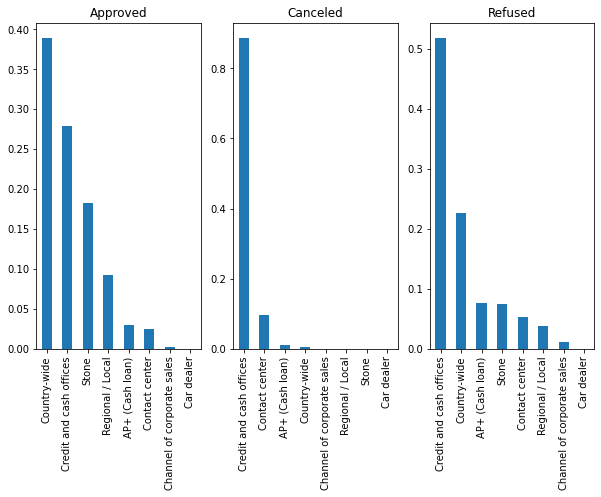

****************************************************************************************************************************************
NAME_SELLER_INDUSTRY


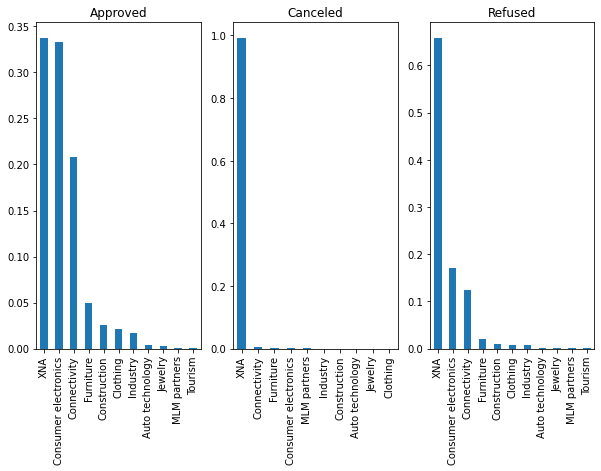

****************************************************************************************************************************************
NAME_YIELD_GROUP


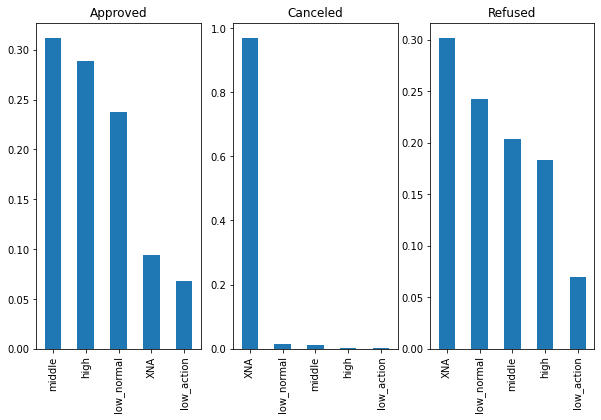

****************************************************************************************************************************************
PRODUCT_COMBINATION


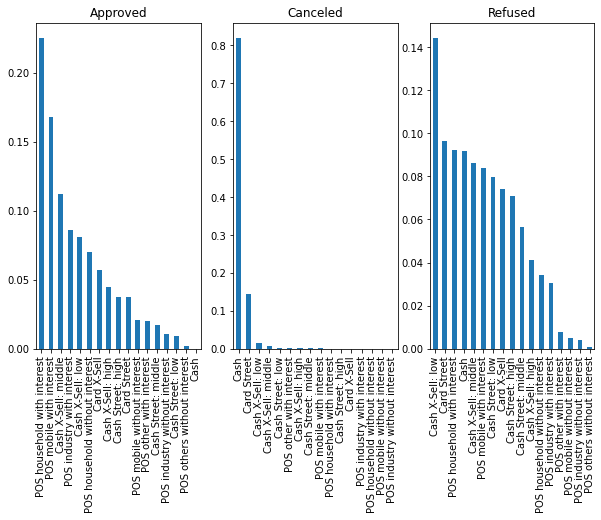

****************************************************************************************************************************************


In [69]:
for c in appli_data3.columns:
  
  if appli_data3[c].dtypes=="object":
    print(c)
    plt.figure(figsize=[10,6])
    plt.subplot(1,3,1)
    plt.title('Approved')
    appli_data3_a[c].value_counts(normalize=True).plot.bar()
    plt.subplot(1,3,2)
    plt.title('Canceled')
    appli_data3_c[c].value_counts(normalize=True).plot.bar()
    plt.subplot(1,3,3)
    plt.title('Refused')
    appli_data3_rr[c].value_counts(normalize=True).plot.bar()    
    plt.show()
    print("****************************************************************************************************************************************")

Notes:(Not All the graphs are use full for our analysis)


1. Cash loans are more Rejected or Cancelled
2. Consumers loans are the most approved loans
3. NAME_CASH_LOAN_PURPOSE: XNA are more Rejected or Cancelled and XAP are most apprived

**Bivariante Analysis :**

**Catagorical vs Numerical**

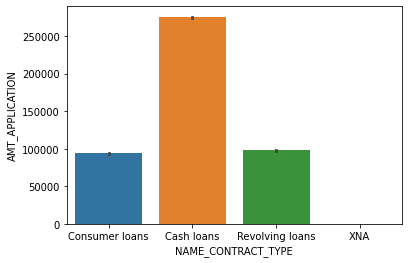

In [70]:
num_col=['AMT_ANNUITY', 'AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']
cat_col=['NAME_CONTRACT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_PORTFOLIO']
sns.barplot(data=appli_data3,x='NAME_CONTRACT_TYPE',y='AMT_APPLICATION')
plt.show()
    

Notes:
1. The applicants who seeks high AMT_Applicantion are preffering  Cash loans 

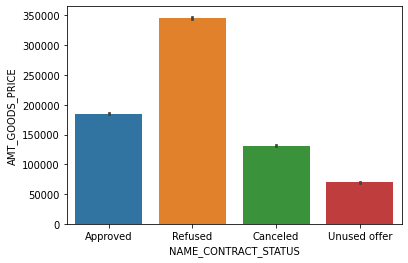

In [71]:
sns.barplot(data=appli_data3,x='NAME_CONTRACT_STATUS',y='AMT_GOODS_PRICE')
plt.show()

notes:
1. If the Goods price increases the chances of loan Refusal is more

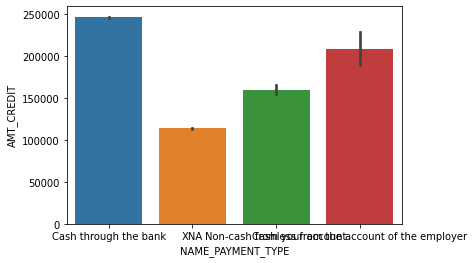

In [72]:
sns.barplot(data=appli_data3,x='NAME_PAYMENT_TYPE',y='AMT_CREDIT')
plt.show()

Notes:
1. If the Credit Amount is high applicants likely to select cash through the bank mode 

**Numerical VS Numerical**

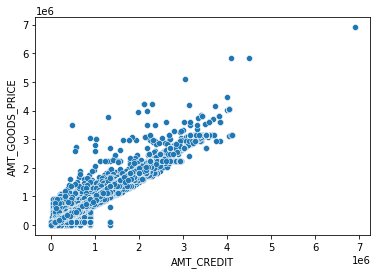

In [ ]:
sns.scatterplot(data=appli_data3,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.show()

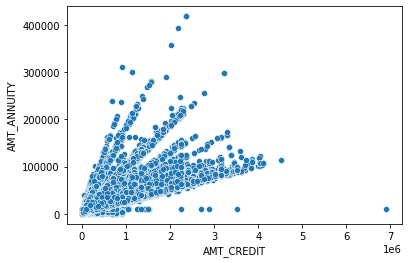

In [ ]:
sns.scatterplot(data=appli_data3,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.show()

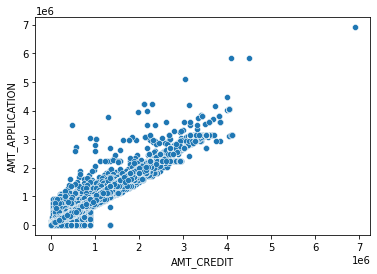

In [ ]:
sns.scatterplot(data=appli_data3,x='AMT_CREDIT',y='AMT_APPLICATION')
plt.show()

Notes:
1. Above graphs clearly shows that with the increase in AMT_APPLICATION, AMT_ANNUITY,AMT_GOODS_PRICE the AMT_CREDIT will also increase liearly

**Multivariate Analysis :**

In [73]:
pd.pivot_table(data=appli_data3,index='NAME_CONTRACT_TYPE',columns='NAME_CONTRACT_STATUS',values='AMT_CREDIT',aggfunc='median')

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CONTRACT_TYPE,,,,
Cash loans,279619.785,0.0,360000.0,0.0
Consumer loans,66064.500,0.0,75010.5,58495.5
Revolving loans,157500.000,0.0,180000.0,0.0
XNA,NaN,0.0,0.0,NaN


Notes:
1. Cash loans are the most approved once with CREDIT maedium amount 

In [74]:
pd.pivot_table(data=appli_data3,index='NAME_CASH_LOAN_PURPOSE',columns='NAME_CONTRACT_STATUS',values='AMT_APPLICATION',aggfunc='median')


NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CASH_LOAN_PURPOSE,,,,
Building a house or an annex,450000.0,913500.0,765000.0,NaN
Business development,438750.0,900000.0,675000.0,NaN
Buying a garage,337500.0,821250.0,675000.0,NaN
Buying a holiday home / land,450000.0,805500.0,1035000.0,NaN
Buying a home,675000.0,1350000.0,1125000.0,NaN
Buying a new car,675000.0,1125000.0,1305000.0,0.0
Buying a used car,450000.0,693000.0,675000.0,0.0
Car repairs,135000.0,225000.0,225000.0,NaN
Education,135000.0,450000.0,180000.0,0.0


Notes:
1. Most of the loans are approved for Building a house or an annex purpose.
2. with higher the AMT_APPLICATION higher the rate of Rejection

**Corelation**

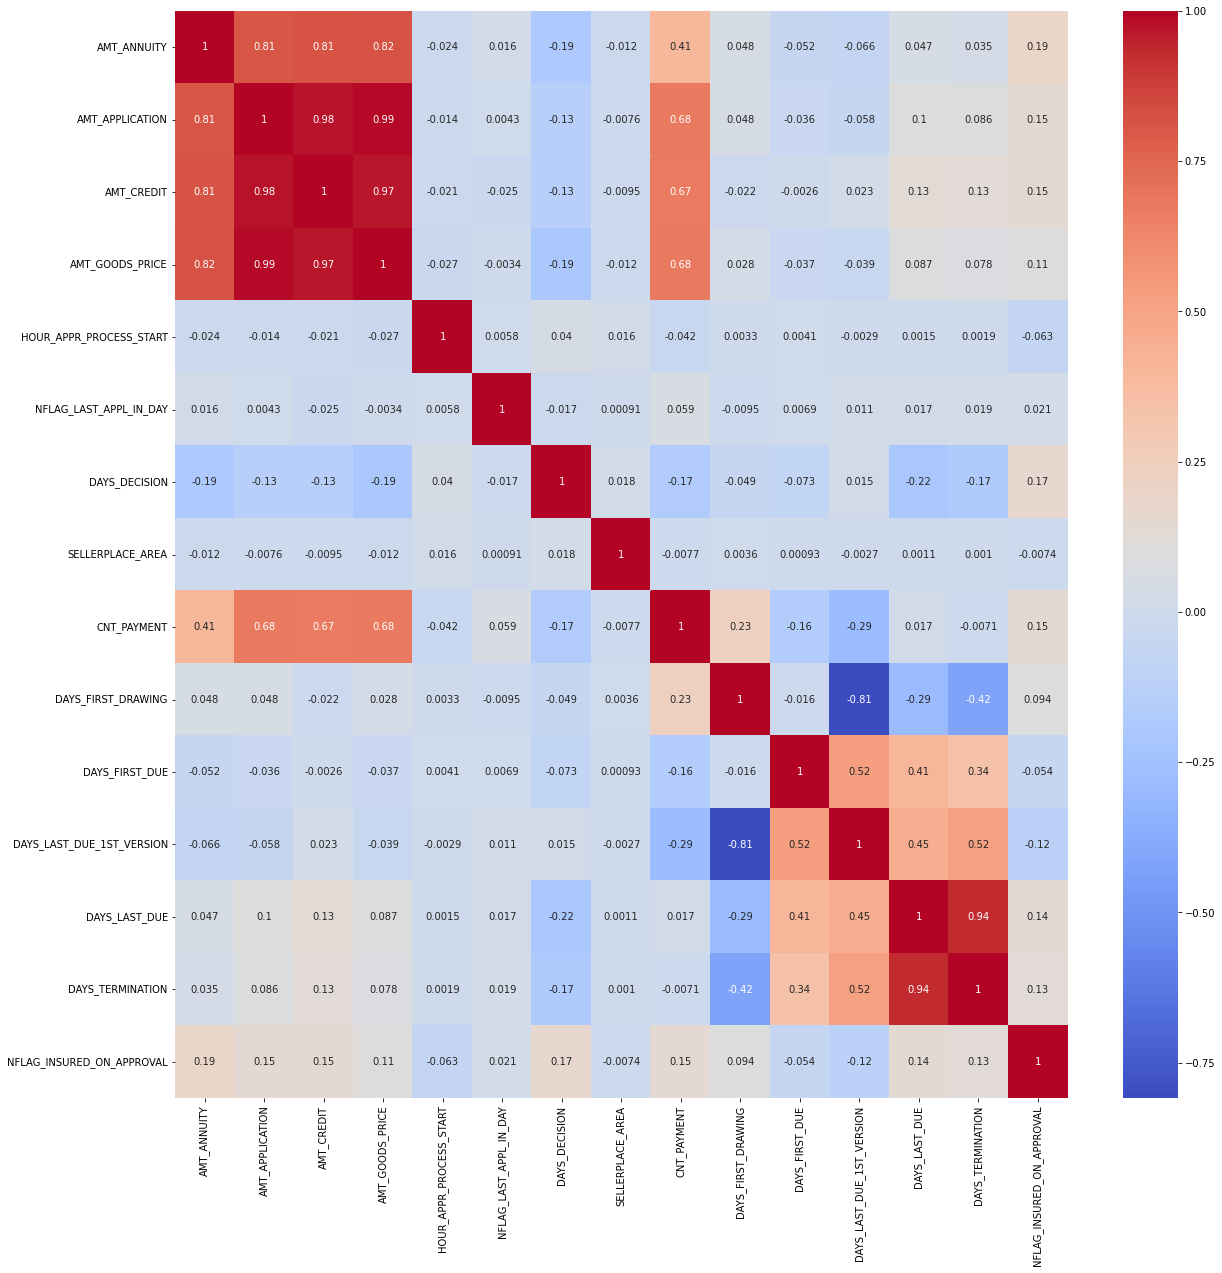

In [75]:
plt.figure(figsize=[20,20])
sns.heatmap(appli_data3.iloc[:,2:].corr(),annot=True,cmap="coolwarm")
plt.show()

Notes:
1. AMT_CREDIT and AMT_GOODS_PRICE has strong corelation
2. AMT_APPLICATION and AMT_CREDIT has strong corelation
3. DAYS_FIRST_DRAWING and DAYS_LAST_DUE_1ST_VERSION has weak corelation

**MERGING THE TWO DATAFRAMES:**

In [76]:
fnl_data=pd.merge(apli_data5,appli_data3,how='left',on='SK_ID_CURR')
fnl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_APPLICATION_RANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,9.0,5,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,medium-h,"(15, 25]",1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0,high
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3.0,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,medium-h,"(35, 45]",1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0,vhigh
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3.0,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,medium-h,"(35, 45]",2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0,high
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3.0,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,medium-h,"(35, 45]",2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0,low
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,11.0,6,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.

**Analysis:**

In [77]:
p=pd.pivot_table(data=fnl_data,index='NAME_CONTRACT_STATUS',columns='TARGET',values='AMT_CREDIT_y',aggfunc='mean')
p

TARGET,0,1
NAME_CONTRACT_STATUS,,
Approved,202310.739821,193280.554519
Canceled,25277.171515,19908.930819
Refused,374053.387022,344100.086126
Unused offer,69944.680912,67628.751442


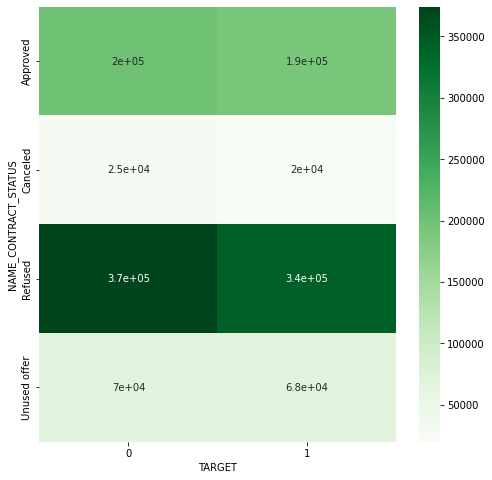

In [78]:
plt.figure(figsize=[8,8])
sns.heatmap(p,annot=True,cmap='Greens')
plt.show()

In [79]:
q=pd.pivot_table(data=fnl_data,index='NAME_CONTRACT_STATUS',columns='NAME_INCOME_TYPE',values='AMT_CREDIT_x',aggfunc='mean')
q

NAME_INCOME_TYPE,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
NAME_CONTRACT_STATUS,,,,,,,
Approved,658090.266824,1030500.0,537240.260162,666114.806077,378077.85,8.984118e+05,582595.476239
Canceled,632441.625107,1435500.0,546063.072043,642104.868837,702850.50,6.443438e+05,564083.290516
Refused,619304.413906,1435500.0,544165.793172,622116.286209,180000.00,7.574211e+05,535529.210256
Unused offer,626542.989452,1435500.0,531448.615385,663253.909091,NaN,1.804500e+06,567985.526517


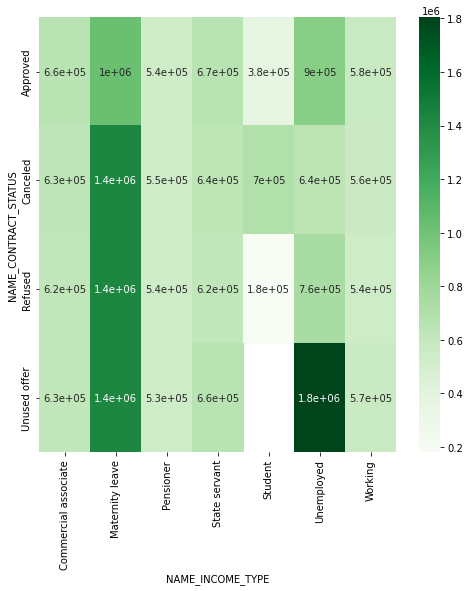

In [80]:
plt.figure(figsize=[8,8])
sns.heatmap(q,annot=True,cmap='Greens')
plt.show()

In [81]:
r=pd.pivot_table(data=fnl_data,index='NAME_CONTRACT_STATUS',columns='NAME_INCOME_TYPE',values='TARGET',aggfunc='sum')
r

NAME_INCOME_TYPE,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
NAME_CONTRACT_STATUS,,,,,,,
Approved,14205.0,10.0,8915.0,3496.0,0.0,31.0,40586.0
Canceled,5094.0,2.0,3507.0,1103.0,0.0,11.0,14083.0
Refused,6447.0,3.0,3434.0,1348.0,0.0,25.0,18181.0
Unused offer,339.0,1.0,102.0,107.0,NaN,0.0,1330.0


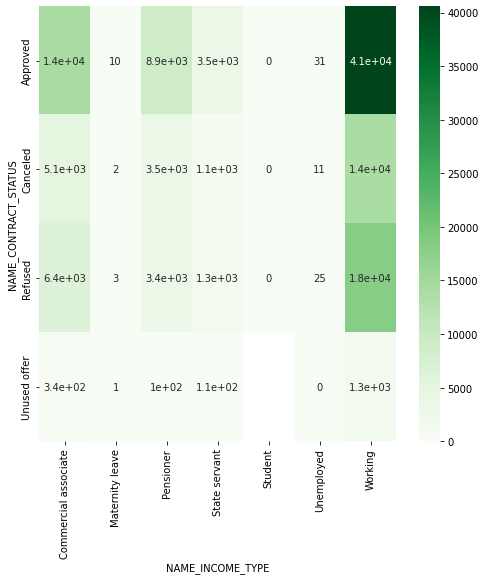

In [82]:
plt.figure(figsize=[8,8])
sns.heatmap(r,annot=True,cmap='Greens')
plt.show()

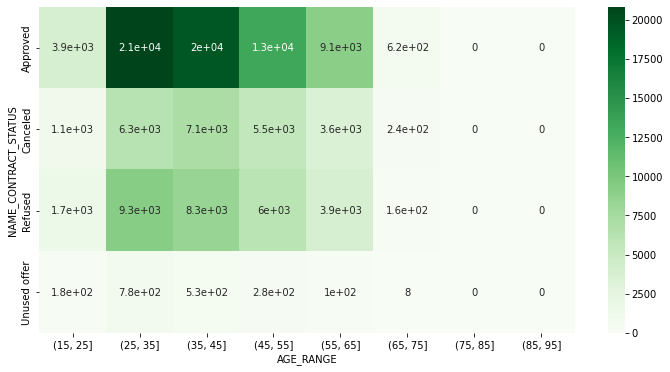

In [83]:
rr=pd.pivot_table(data=fnl_data,index="NAME_CONTRACT_STATUS",columns="AGE_RANGE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(rr, annot=True,cmap='Greens')
plt.show()

Notes:
1. The Major observation was that the applications which are cancelled or refused are now defaulters
2. With the Age group range 25-35 and 35-45 years are more approved


**Overall Analysis:**

1. 90% applicants are taking Cash loans
2. 60% loans are getting approved
3. 10% applicants are defaulters
4. Age group 25-35 years ,35-45 years old are more applicants
5. Applicants with higher education are likely to pay the loans less risk
6. Most of the loans are approved for Female applicants 
7. Applicants who are married and average income range are consider to be the risk goups as it contain more defaulters.
8. Applicants who are previously taken loans are less defaulters
9. Lower secondary education group has high number of defaulters